In [16]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings
from sklearn import datasets

warnings.filterwarnings('ignore')

In [4]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [6]:
y[:5]

array([1, 0, 0, 1, 1])

In [3]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans_cluster = KMeans(n_clusters=3, random_state=123)

%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

28.8 ms ± 8.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


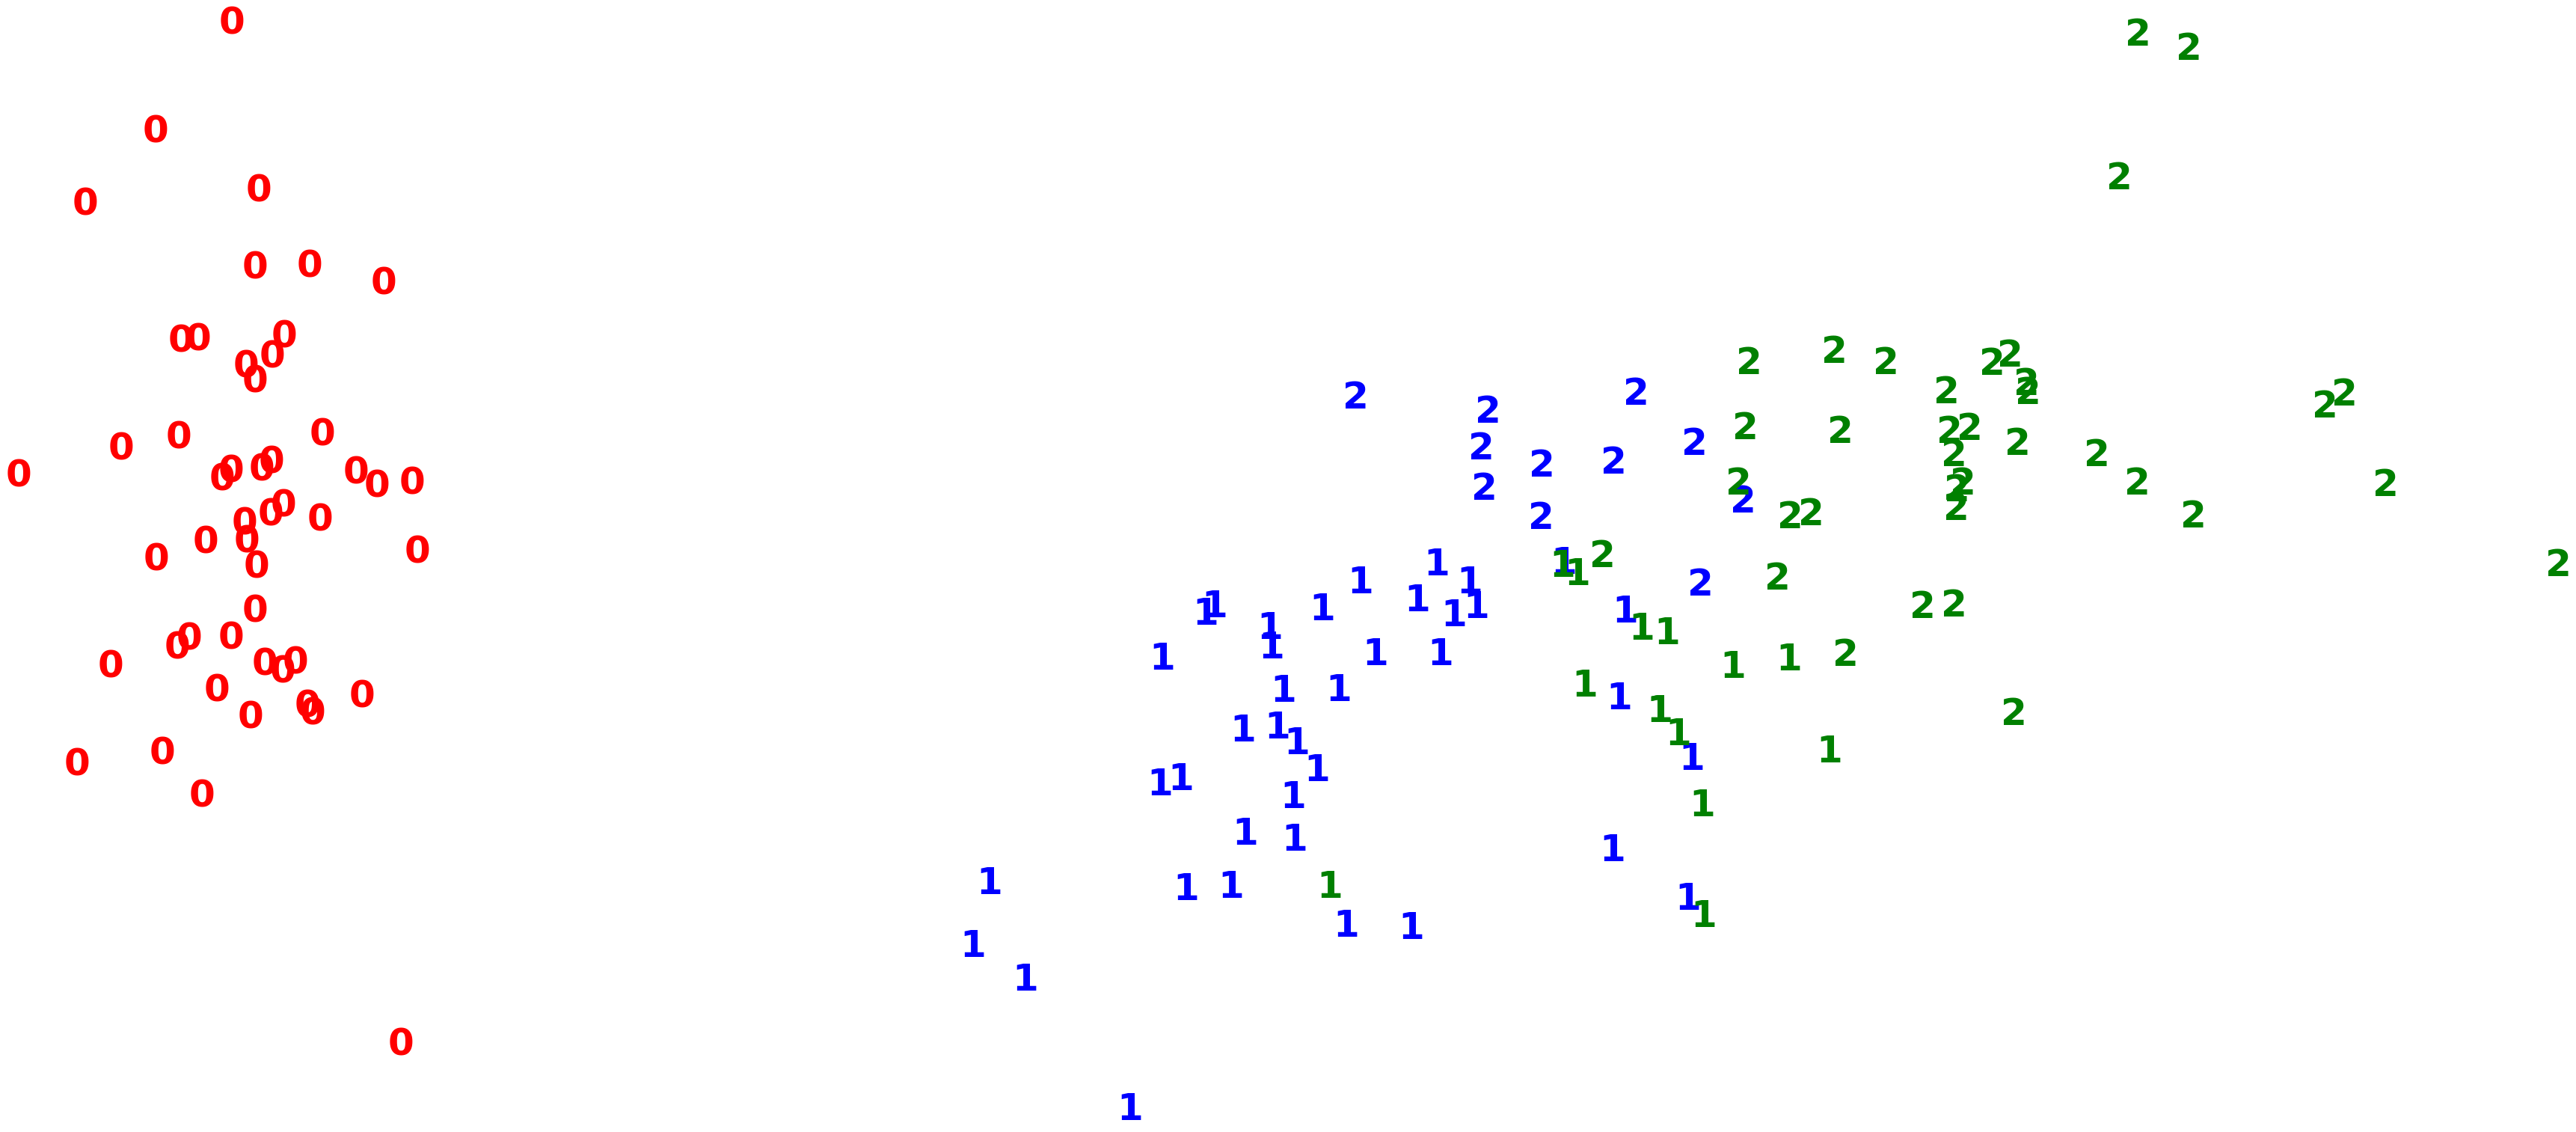

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colors = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i,0], pca[i,1], str(y_pred[i]),
            color=colors[y[i]],
            fontdict={'weight': 'bold', 'size': 50}
        )
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

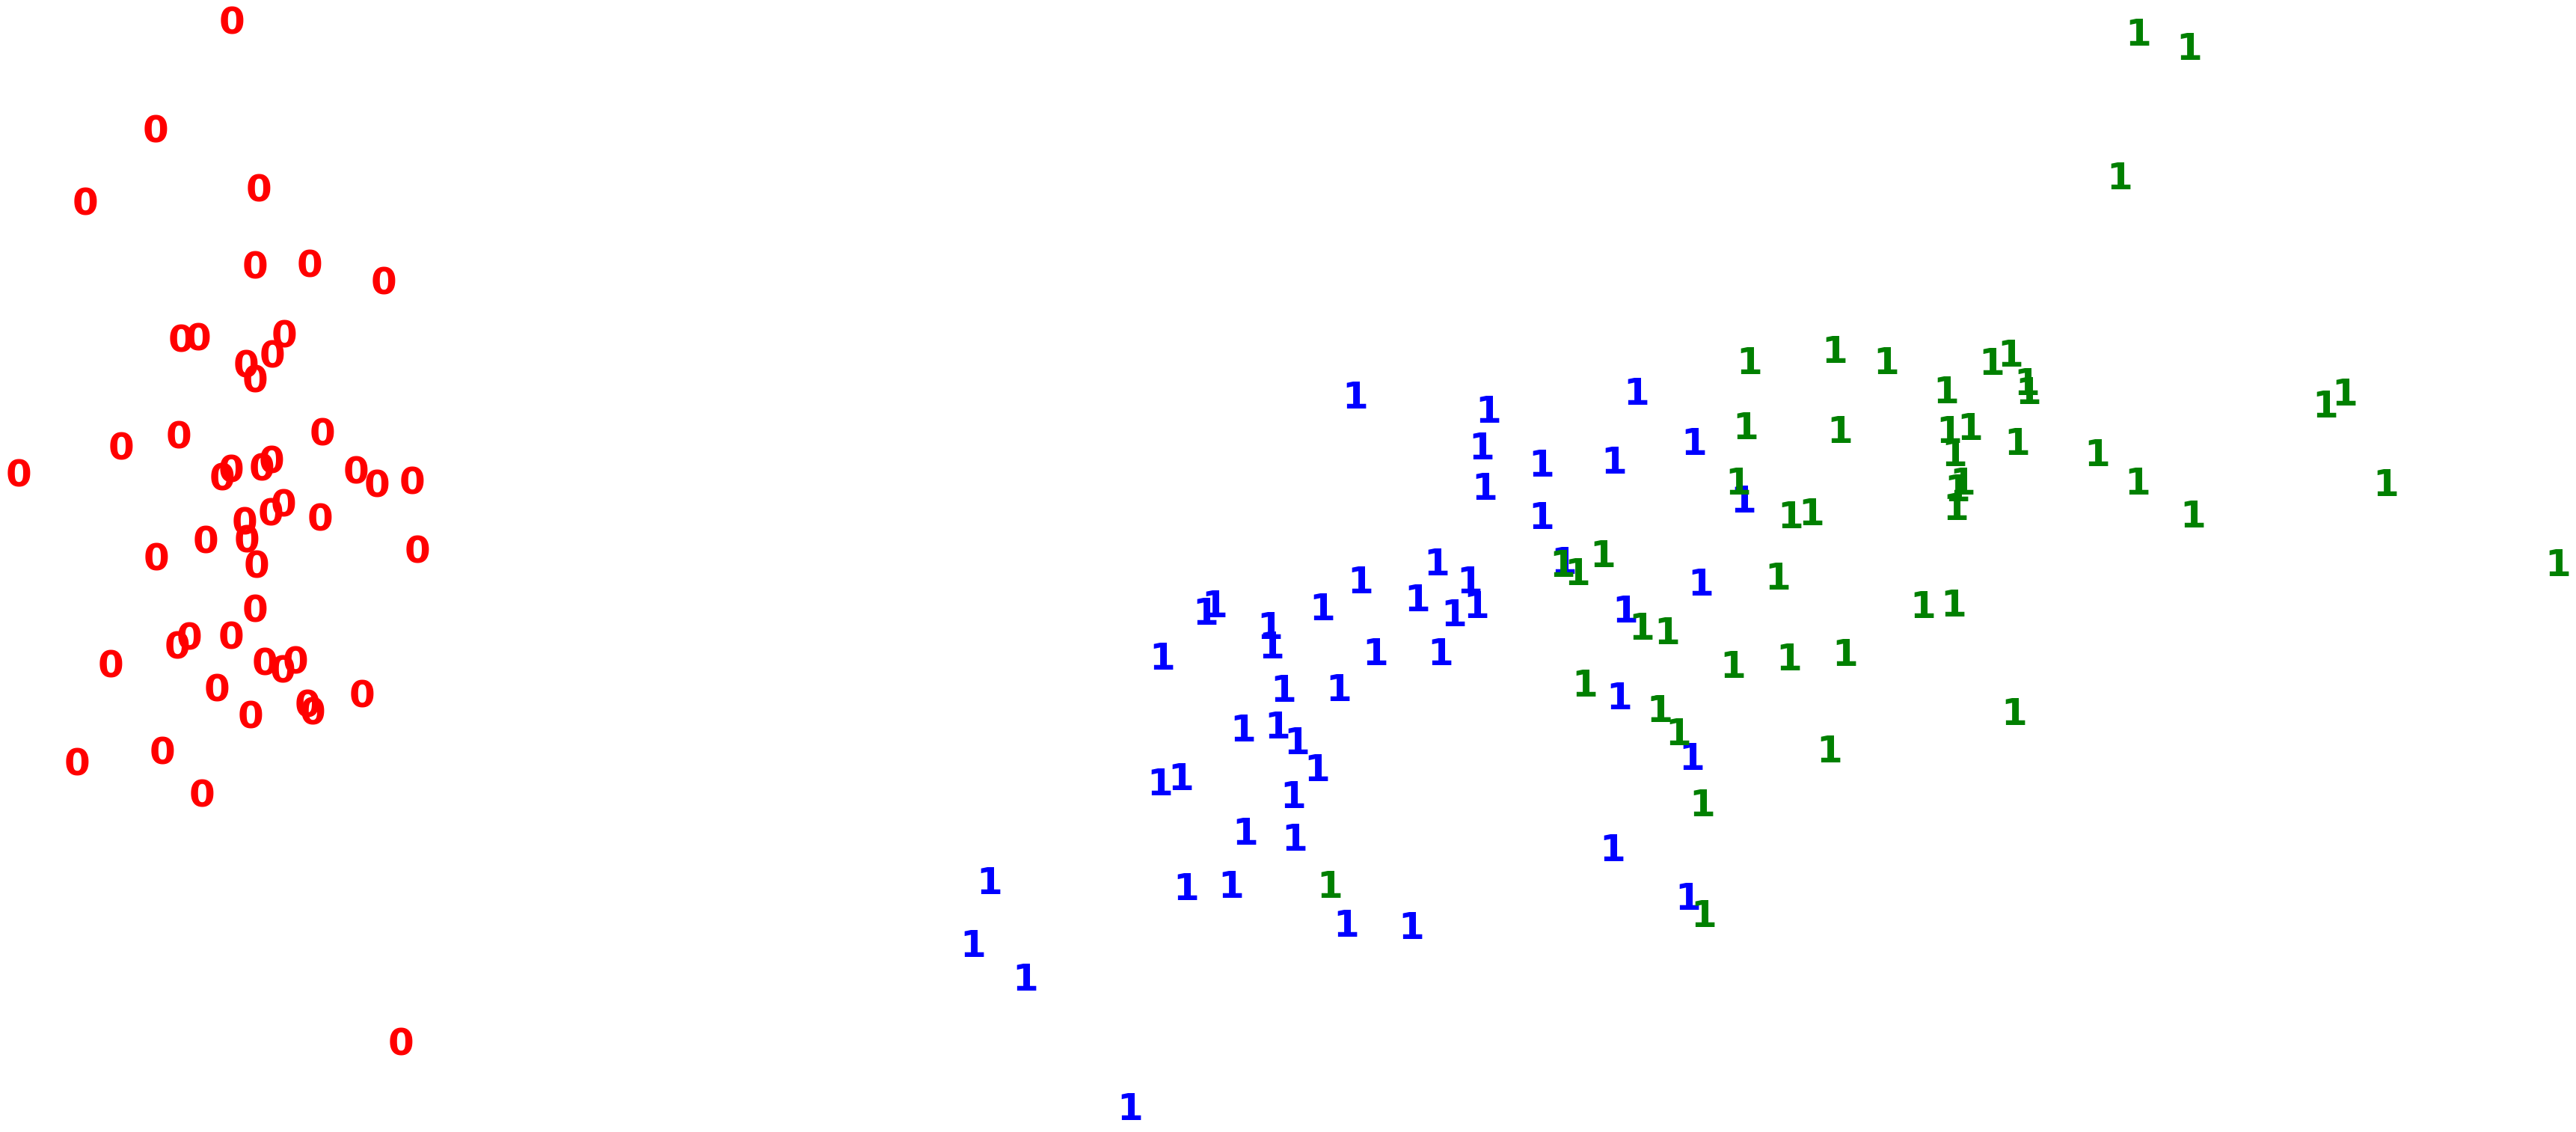

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans_cluster = KMeans(n_clusters=2, random_state=123)
kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colors = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i,0], pca[i,1], str(y_pred[i]),
            color=colors[y[i]],
            fontdict={'weight': 'bold', 'size': 50}
        )
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

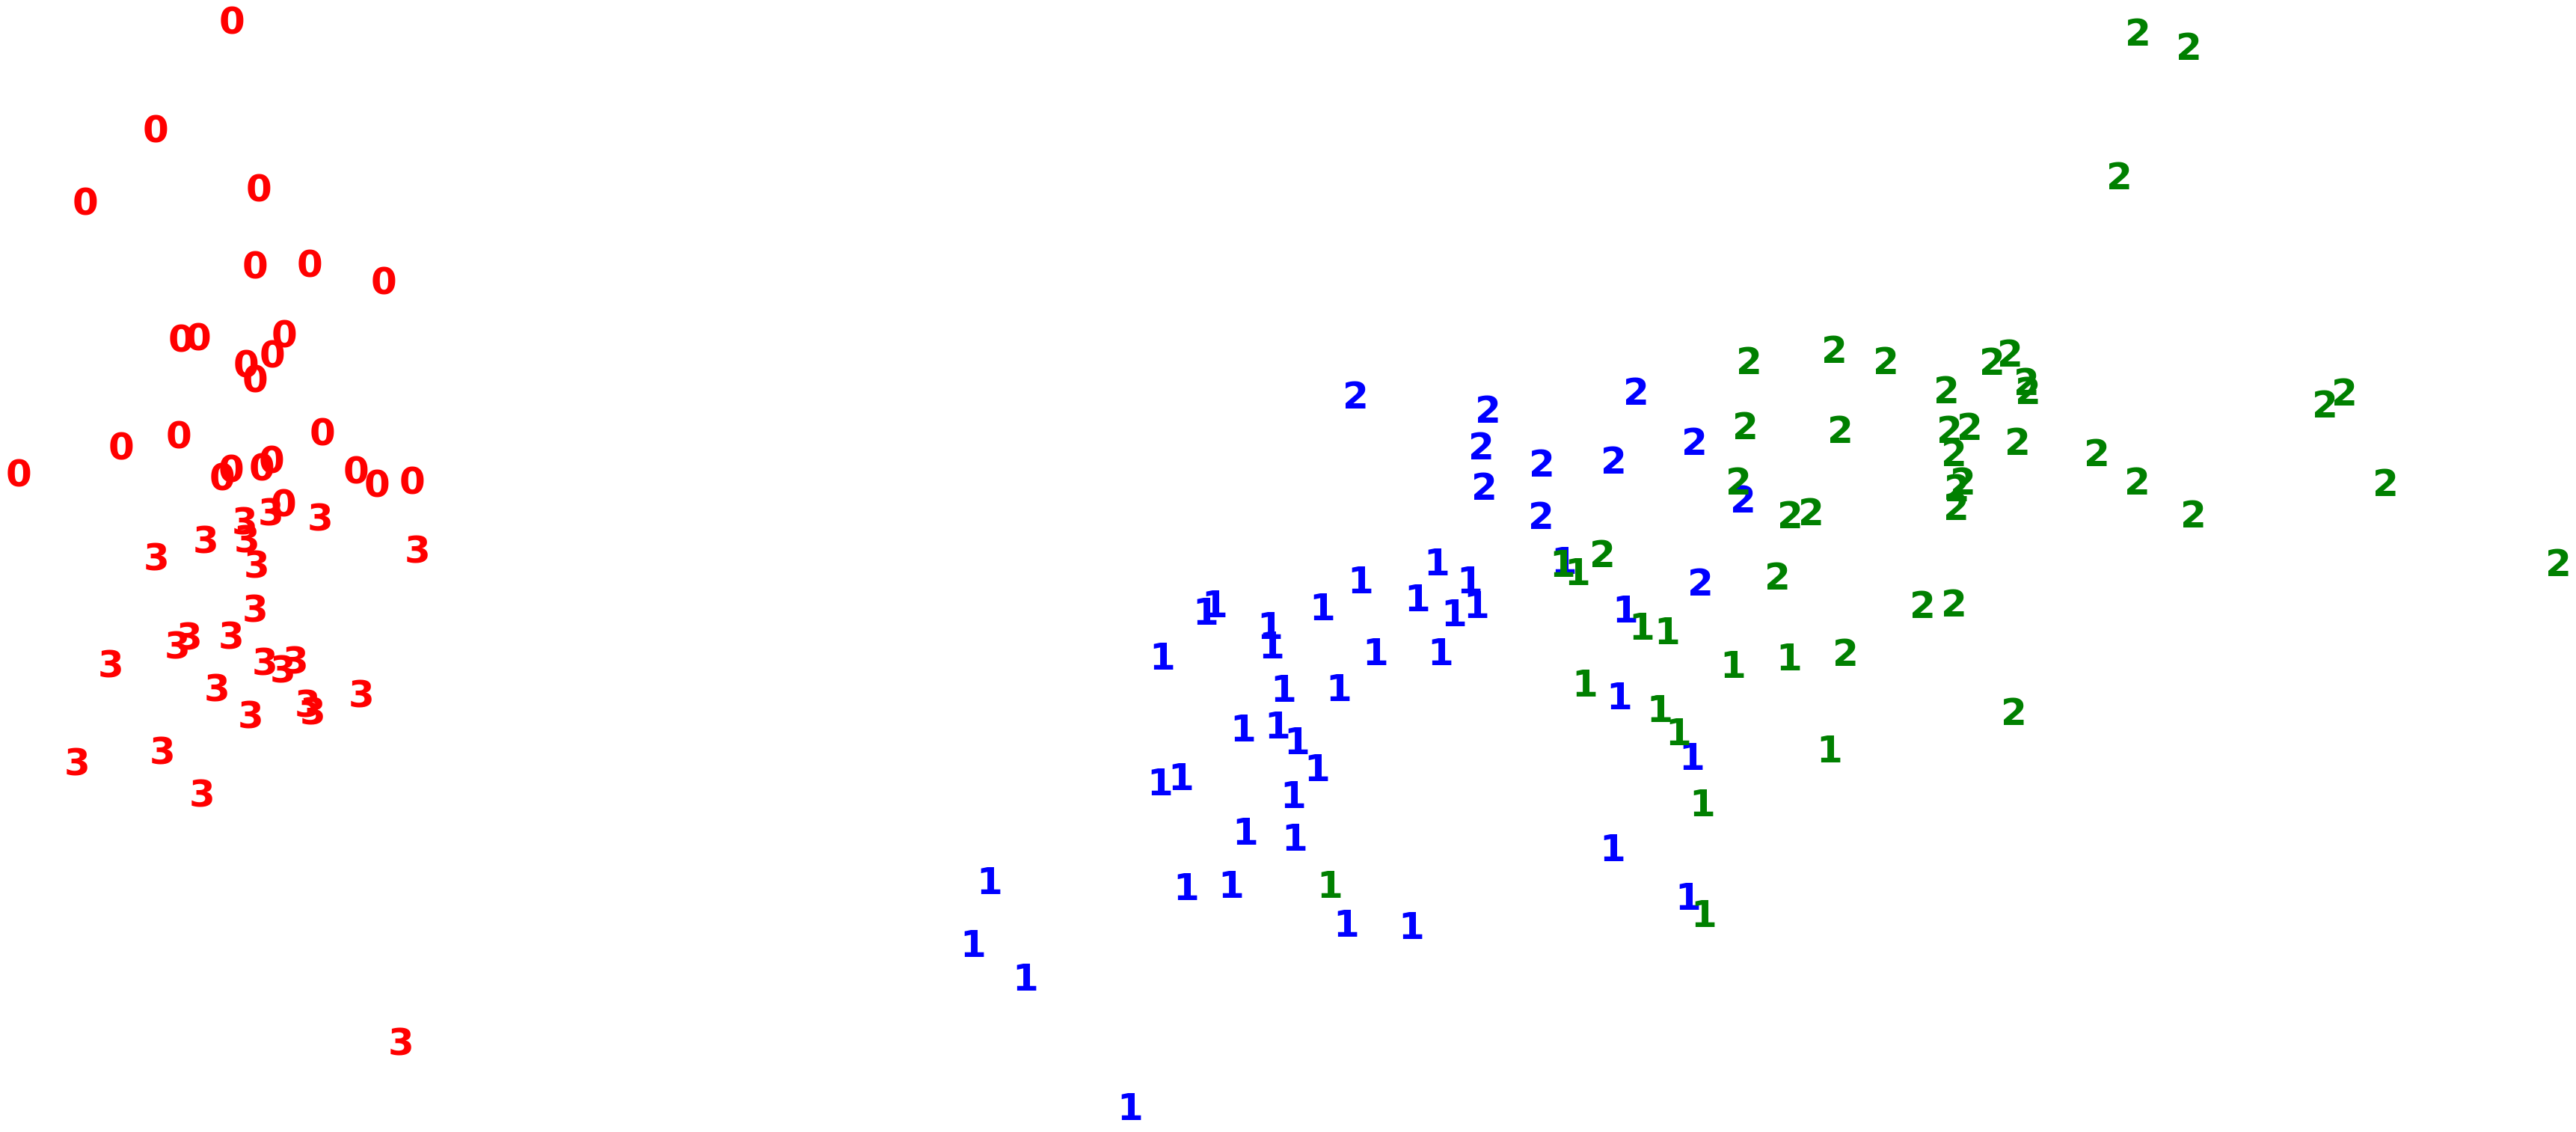

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans_cluster = KMeans(n_clusters=4, random_state=123)
kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colors = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i,0], pca[i,1], str(y_pred[i]),
            color=colors[y[i]],
            fontdict={'weight': 'bold', 'size': 50}
        )
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

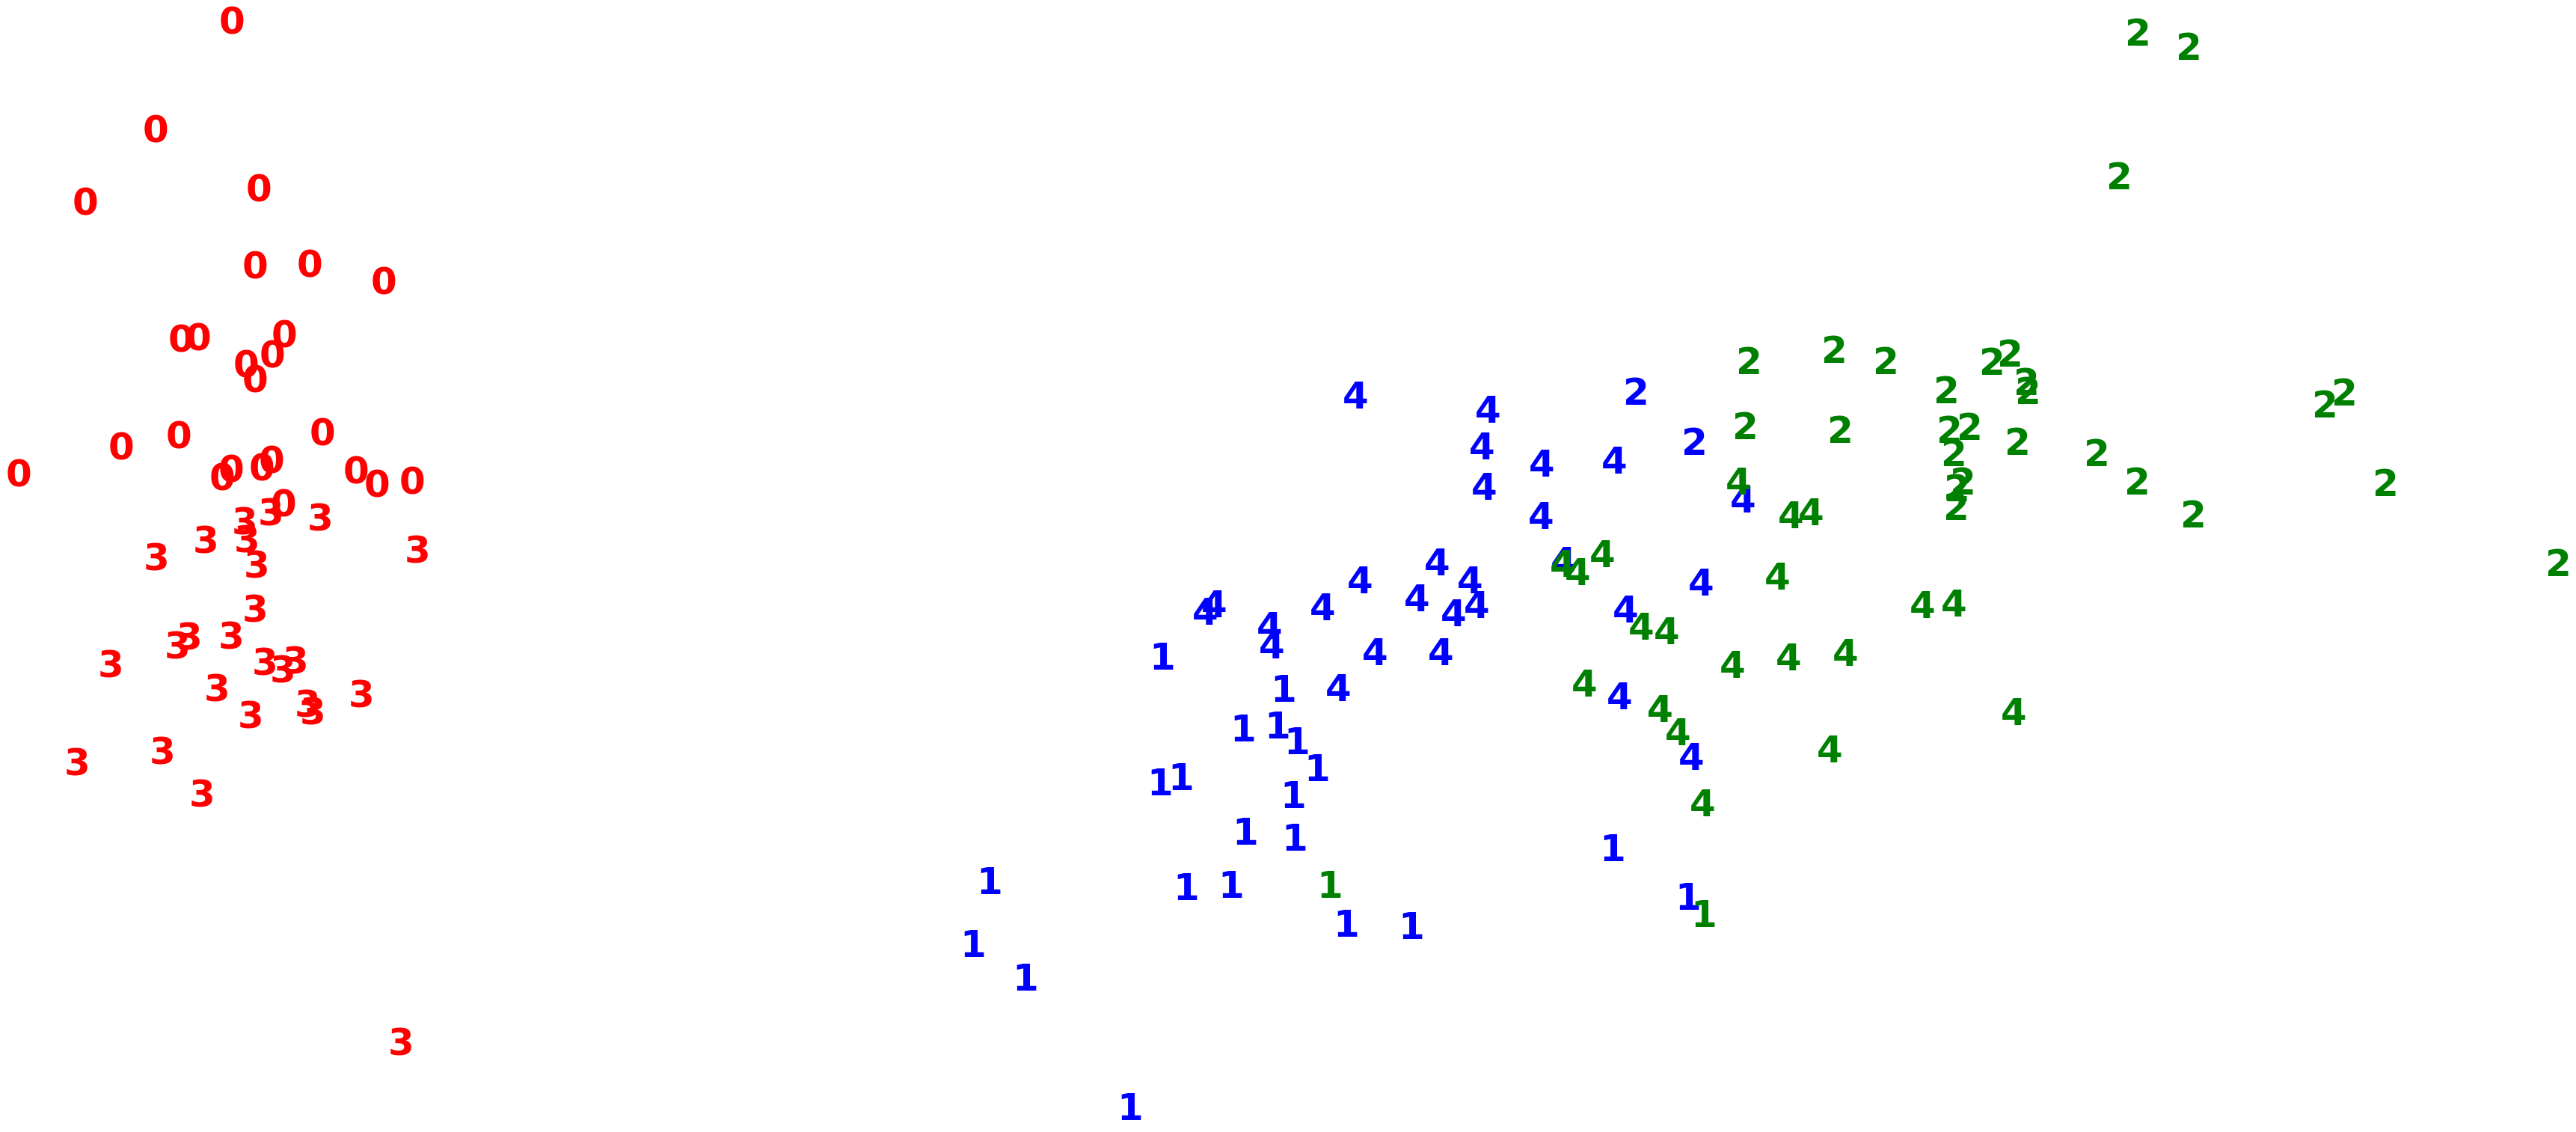

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans_cluster = KMeans(n_clusters=5, random_state=123)
kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colors = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i,0], pca[i,1], str(y_pred[i]),
            color=colors[y[i]],
            fontdict={'weight': 'bold', 'size': 50}
        )
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

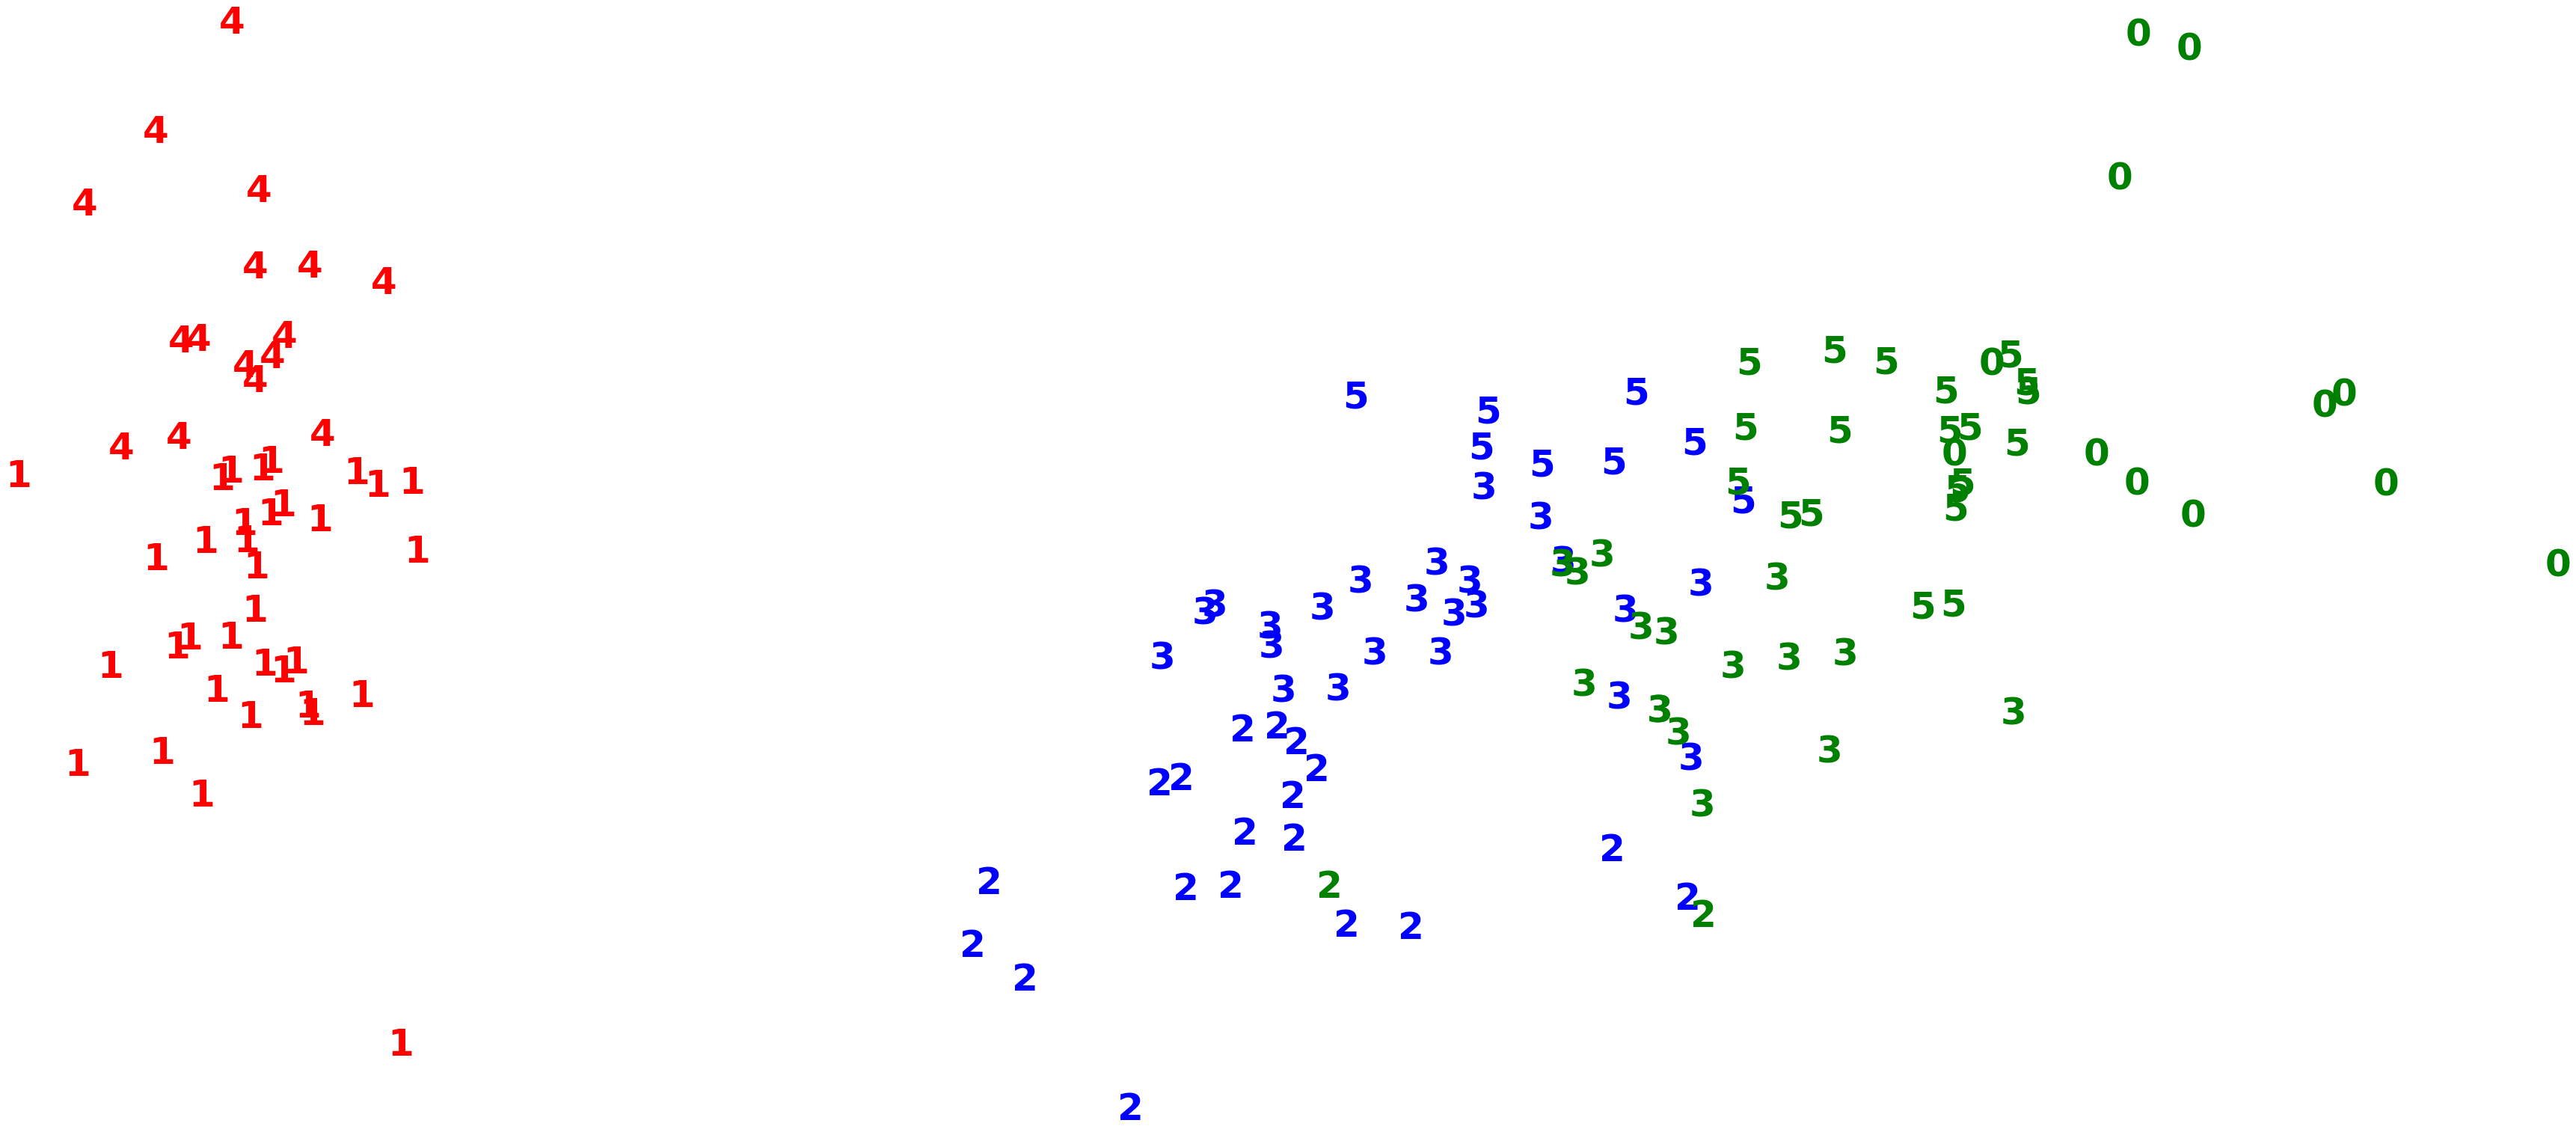

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans_cluster = KMeans(n_clusters=6, random_state=123)
kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colors = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i,0], pca[i,1], str(y_pred[i]),
            color=colors[y[i]],
            fontdict={'weight': 'bold', 'size': 50}
        )
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Trying 2-6 clusters, I don't really see a method that works much better than 3. Two clusters obviously provides a cleaner or more intuitive separation, but there's no way to differentiate between the blue and green group. If we were using unlabeled data, this would seem most intuitive.

In [17]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

engine.dispose()

# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

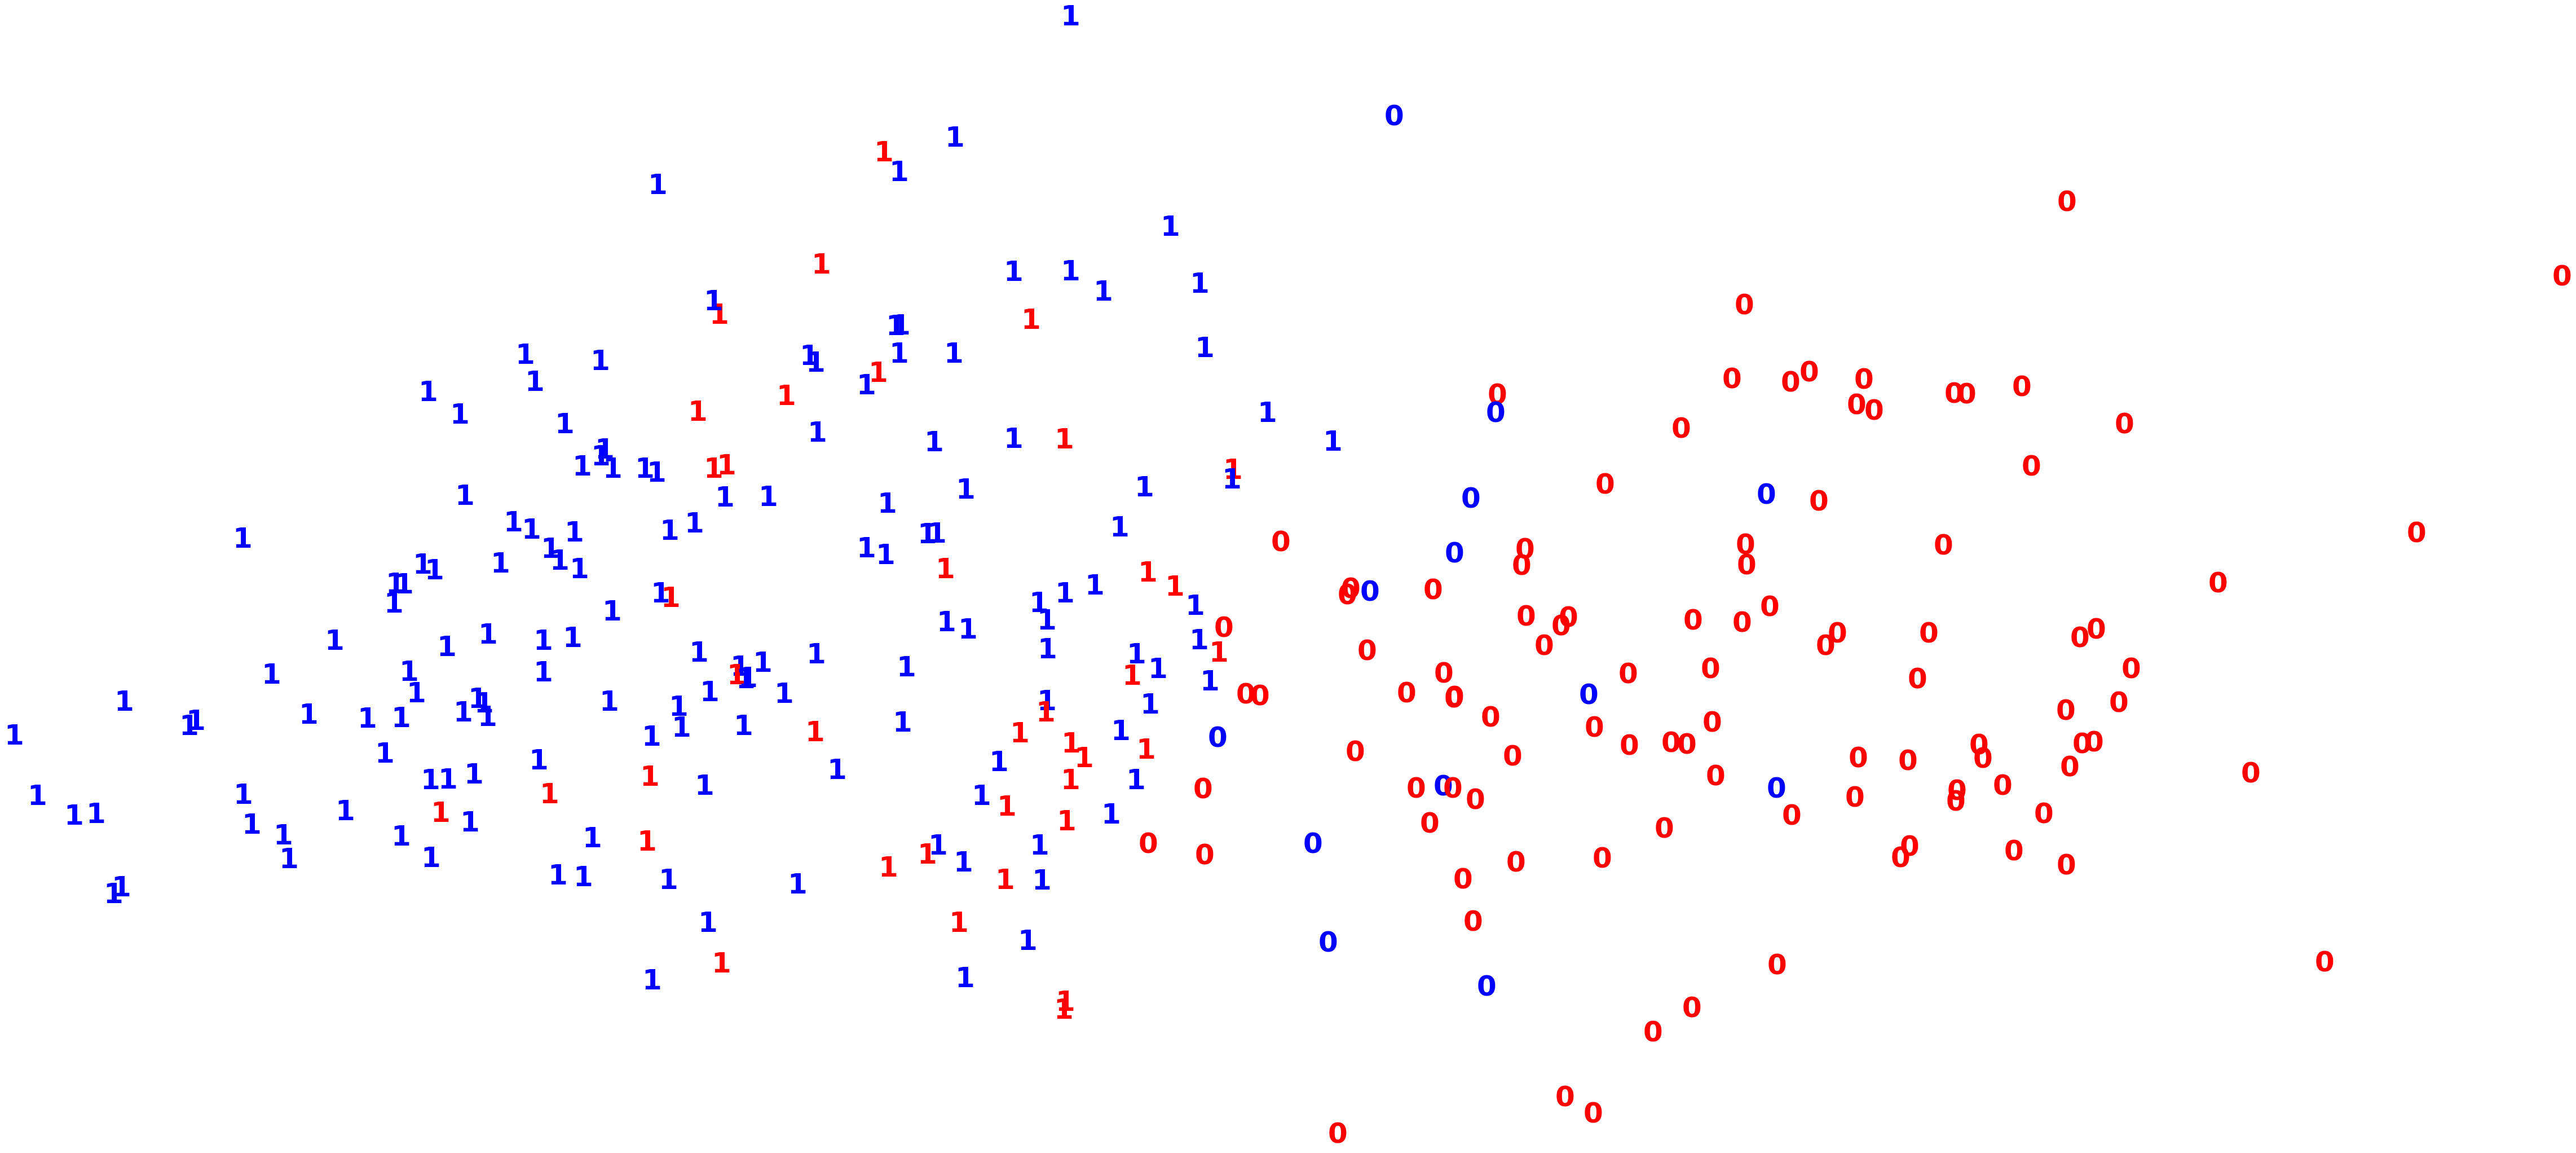

In [18]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans_cluster = KMeans(n_clusters=2, random_state=123)
kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colors = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i,0], pca[i,1], str(y_pred[i]),
            color=colors[y[i]],
            fontdict={'weight': 'bold', 'size': 50}
        )
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

It seems like there's a relatively clear point around the middle of the graph, where to the left, there are more blue data points, and more red to the right. It seems unlikely that more fine clustering will be able to decipher these more clearly, but we are visualizing the data in two dimensions, and it's possible the detail that's lost can provide more accurate prediction.

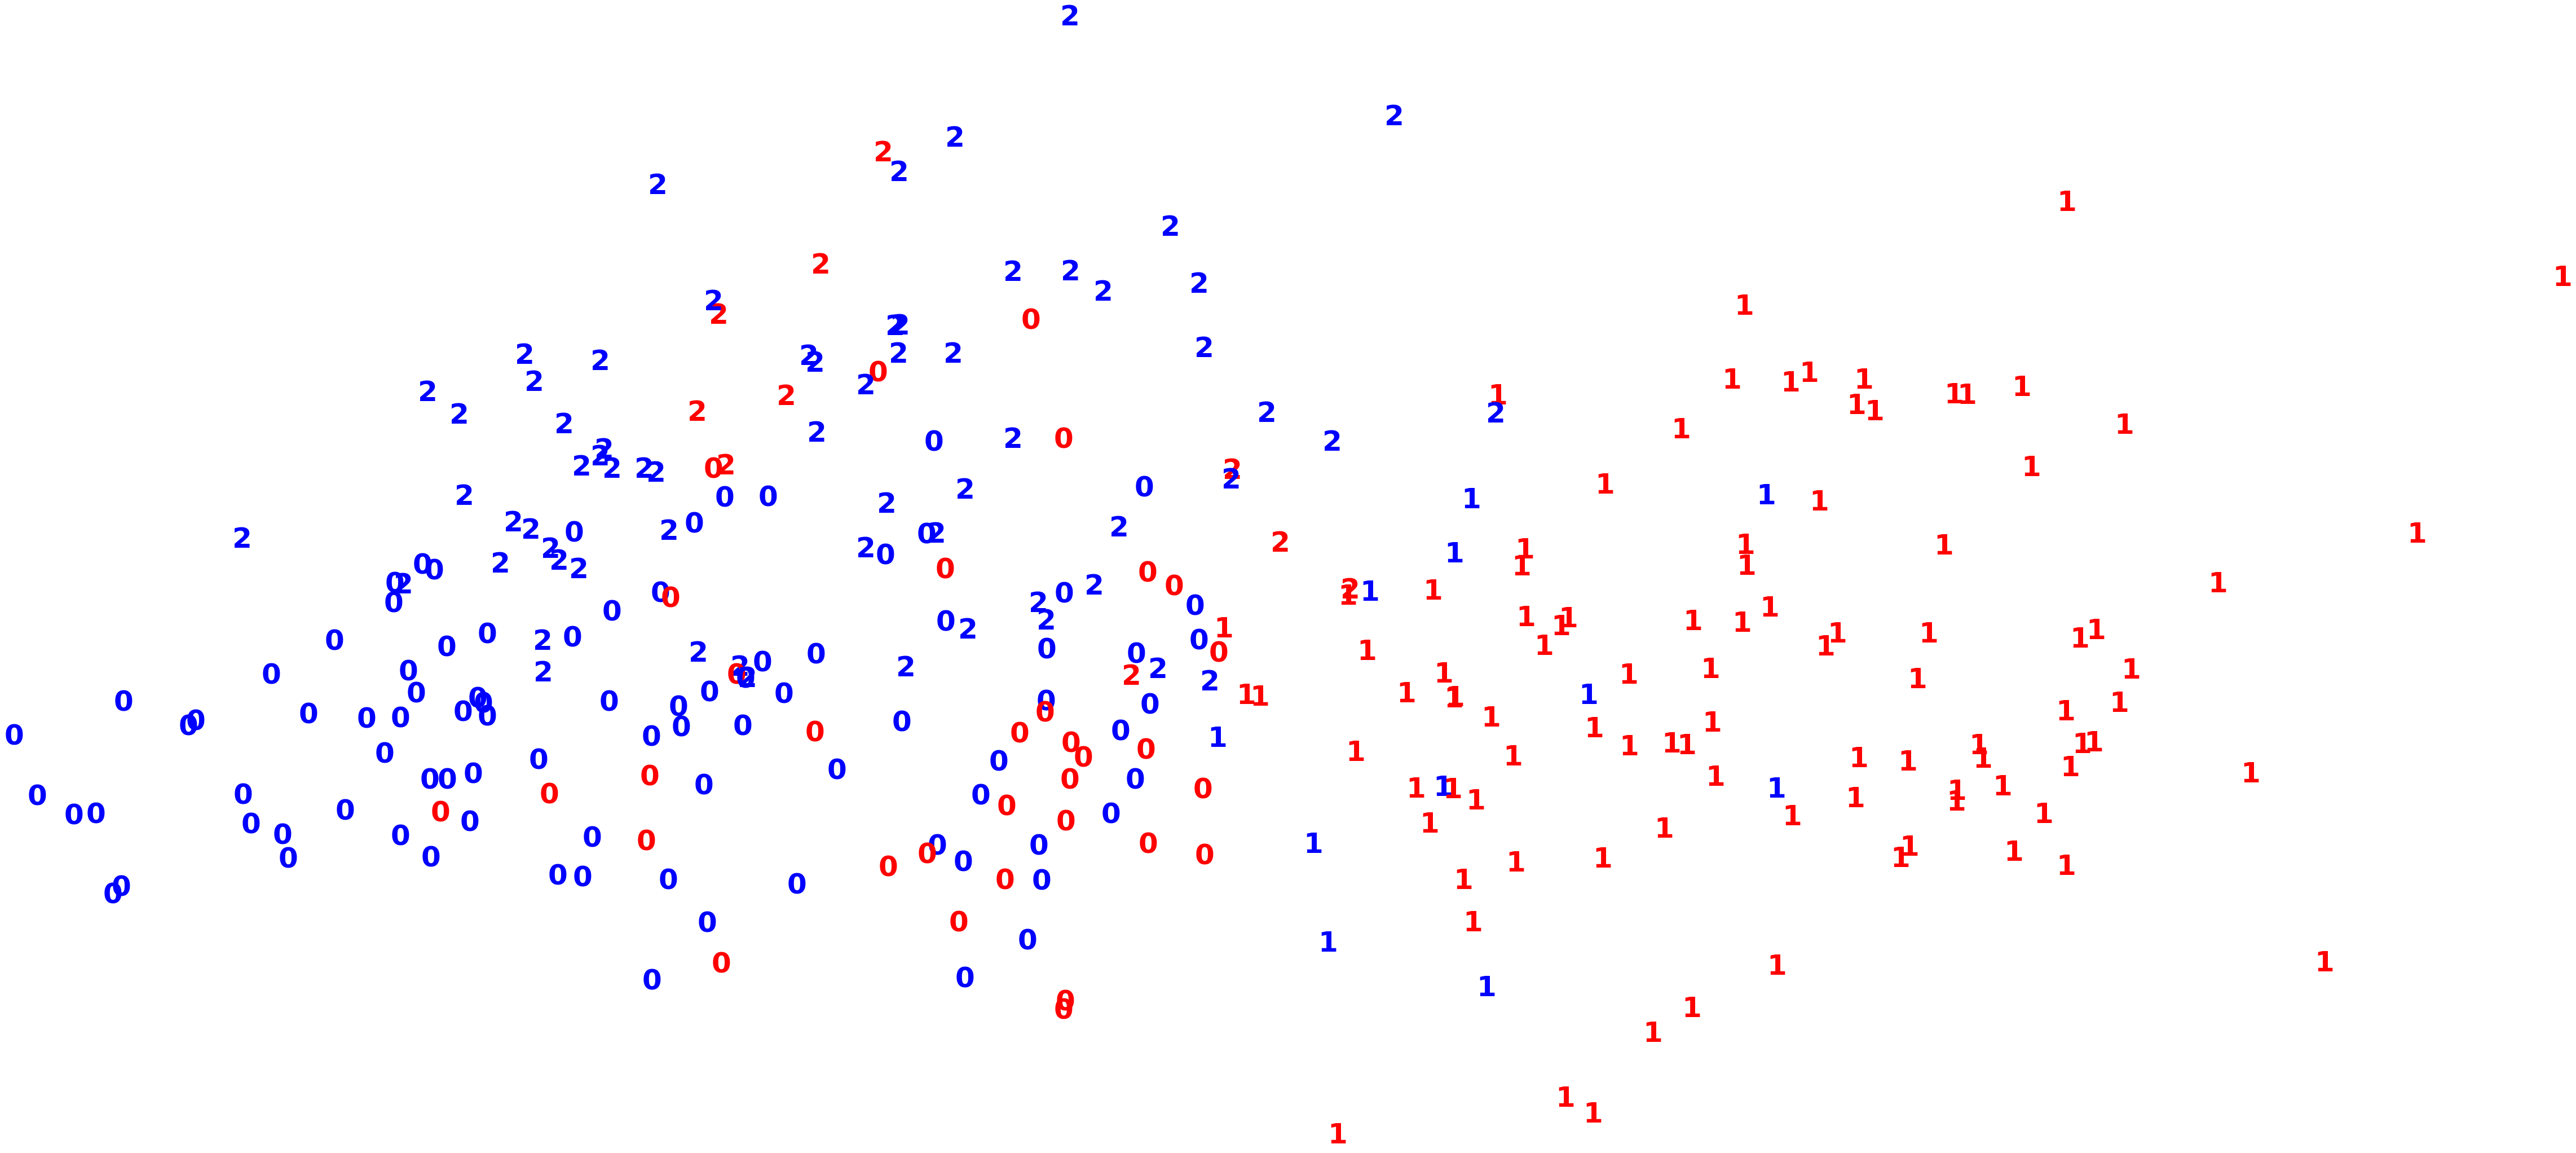

In [19]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans_cluster = KMeans(n_clusters=3, random_state=123)
kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colors = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i,0], pca[i,1], str(y_pred[i]),
            color=colors[y[i]],
            fontdict={'weight': 'bold', 'size': 50}
        )
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

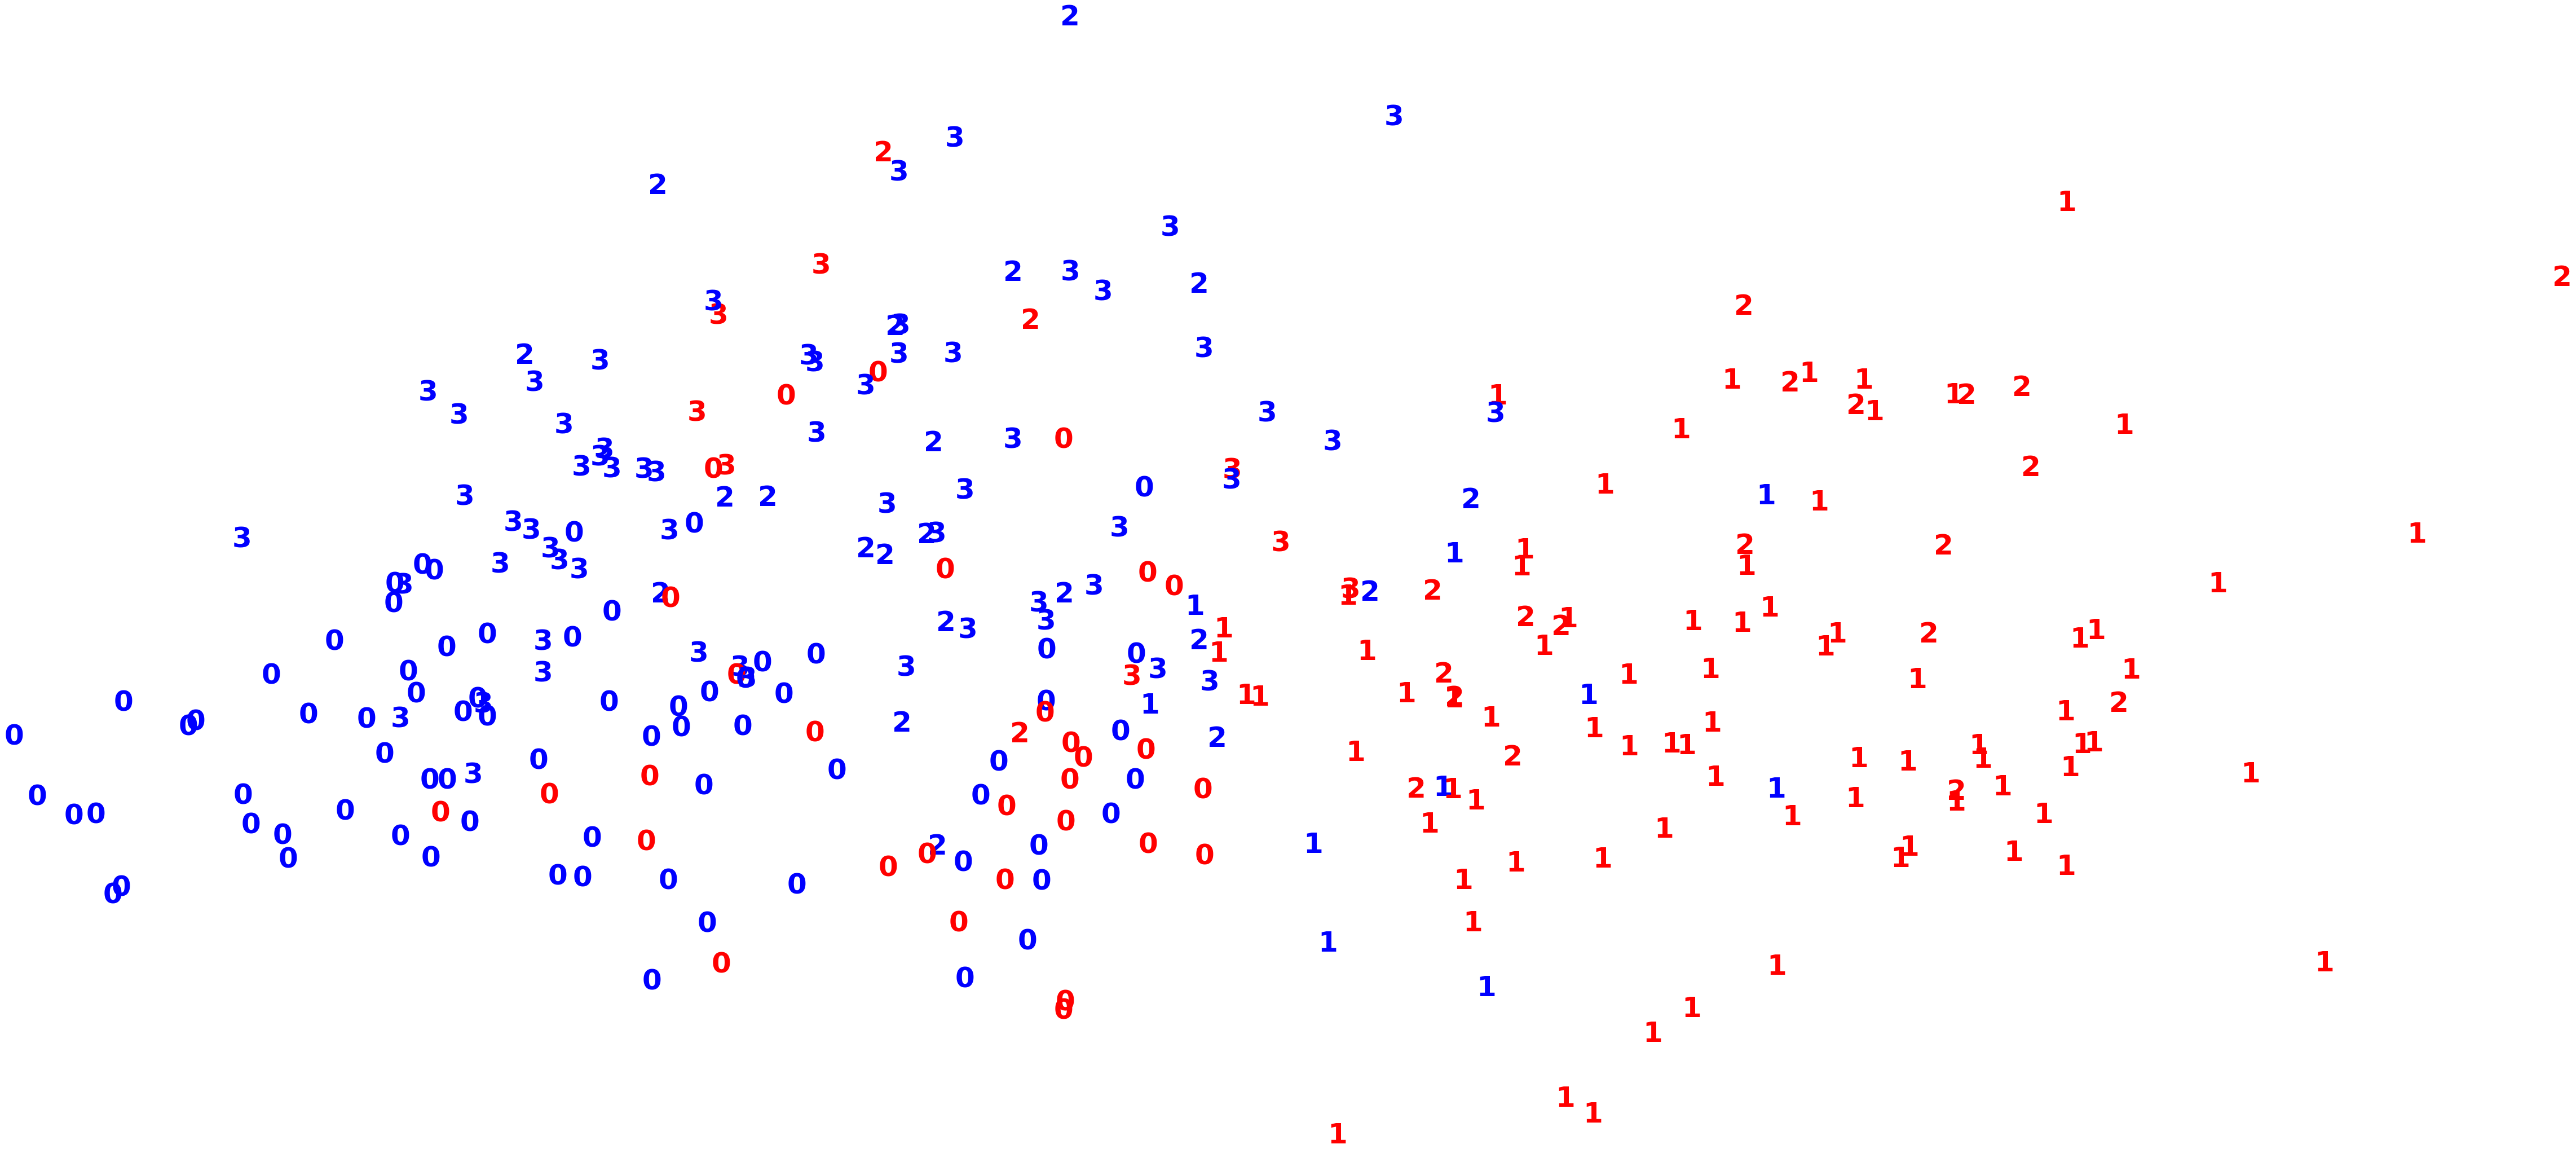

In [20]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans_cluster = KMeans(n_clusters=4, random_state=123)
kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colors = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i,0], pca[i,1], str(y_pred[i]),
            color=colors[y[i]],
            fontdict={'weight': 'bold', 'size': 50}
        )
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

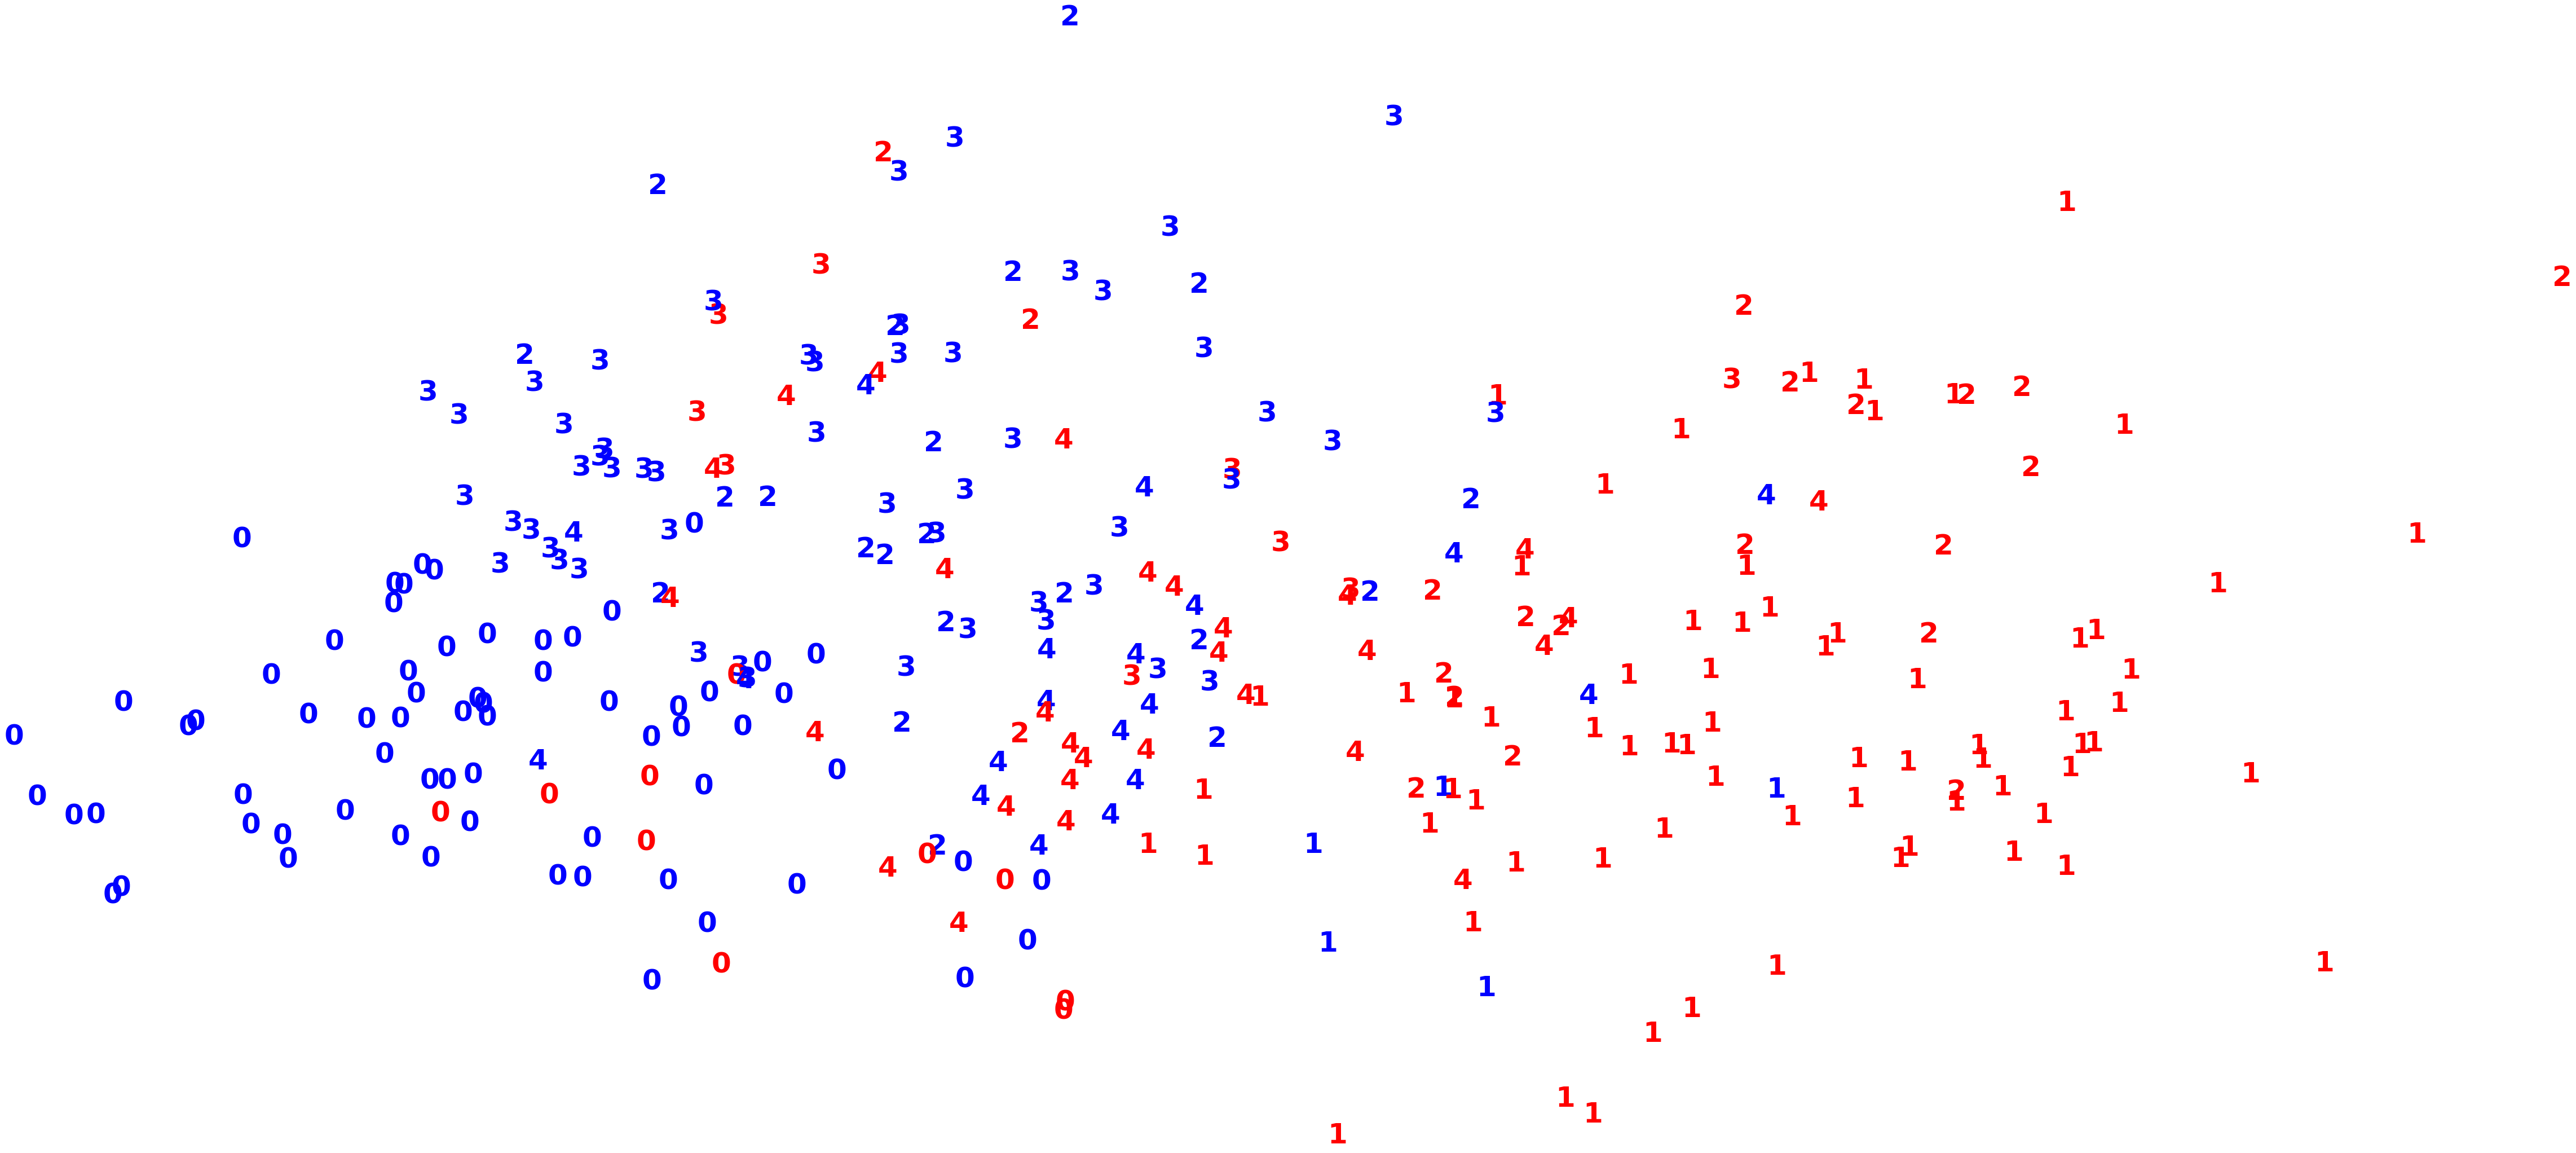

In [21]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans_cluster = KMeans(n_clusters=5, random_state=123)
kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colors = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i,0], pca[i,1], str(y_pred[i]),
            color=colors[y[i]],
            fontdict={'weight': 'bold', 'size': 50}
        )
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

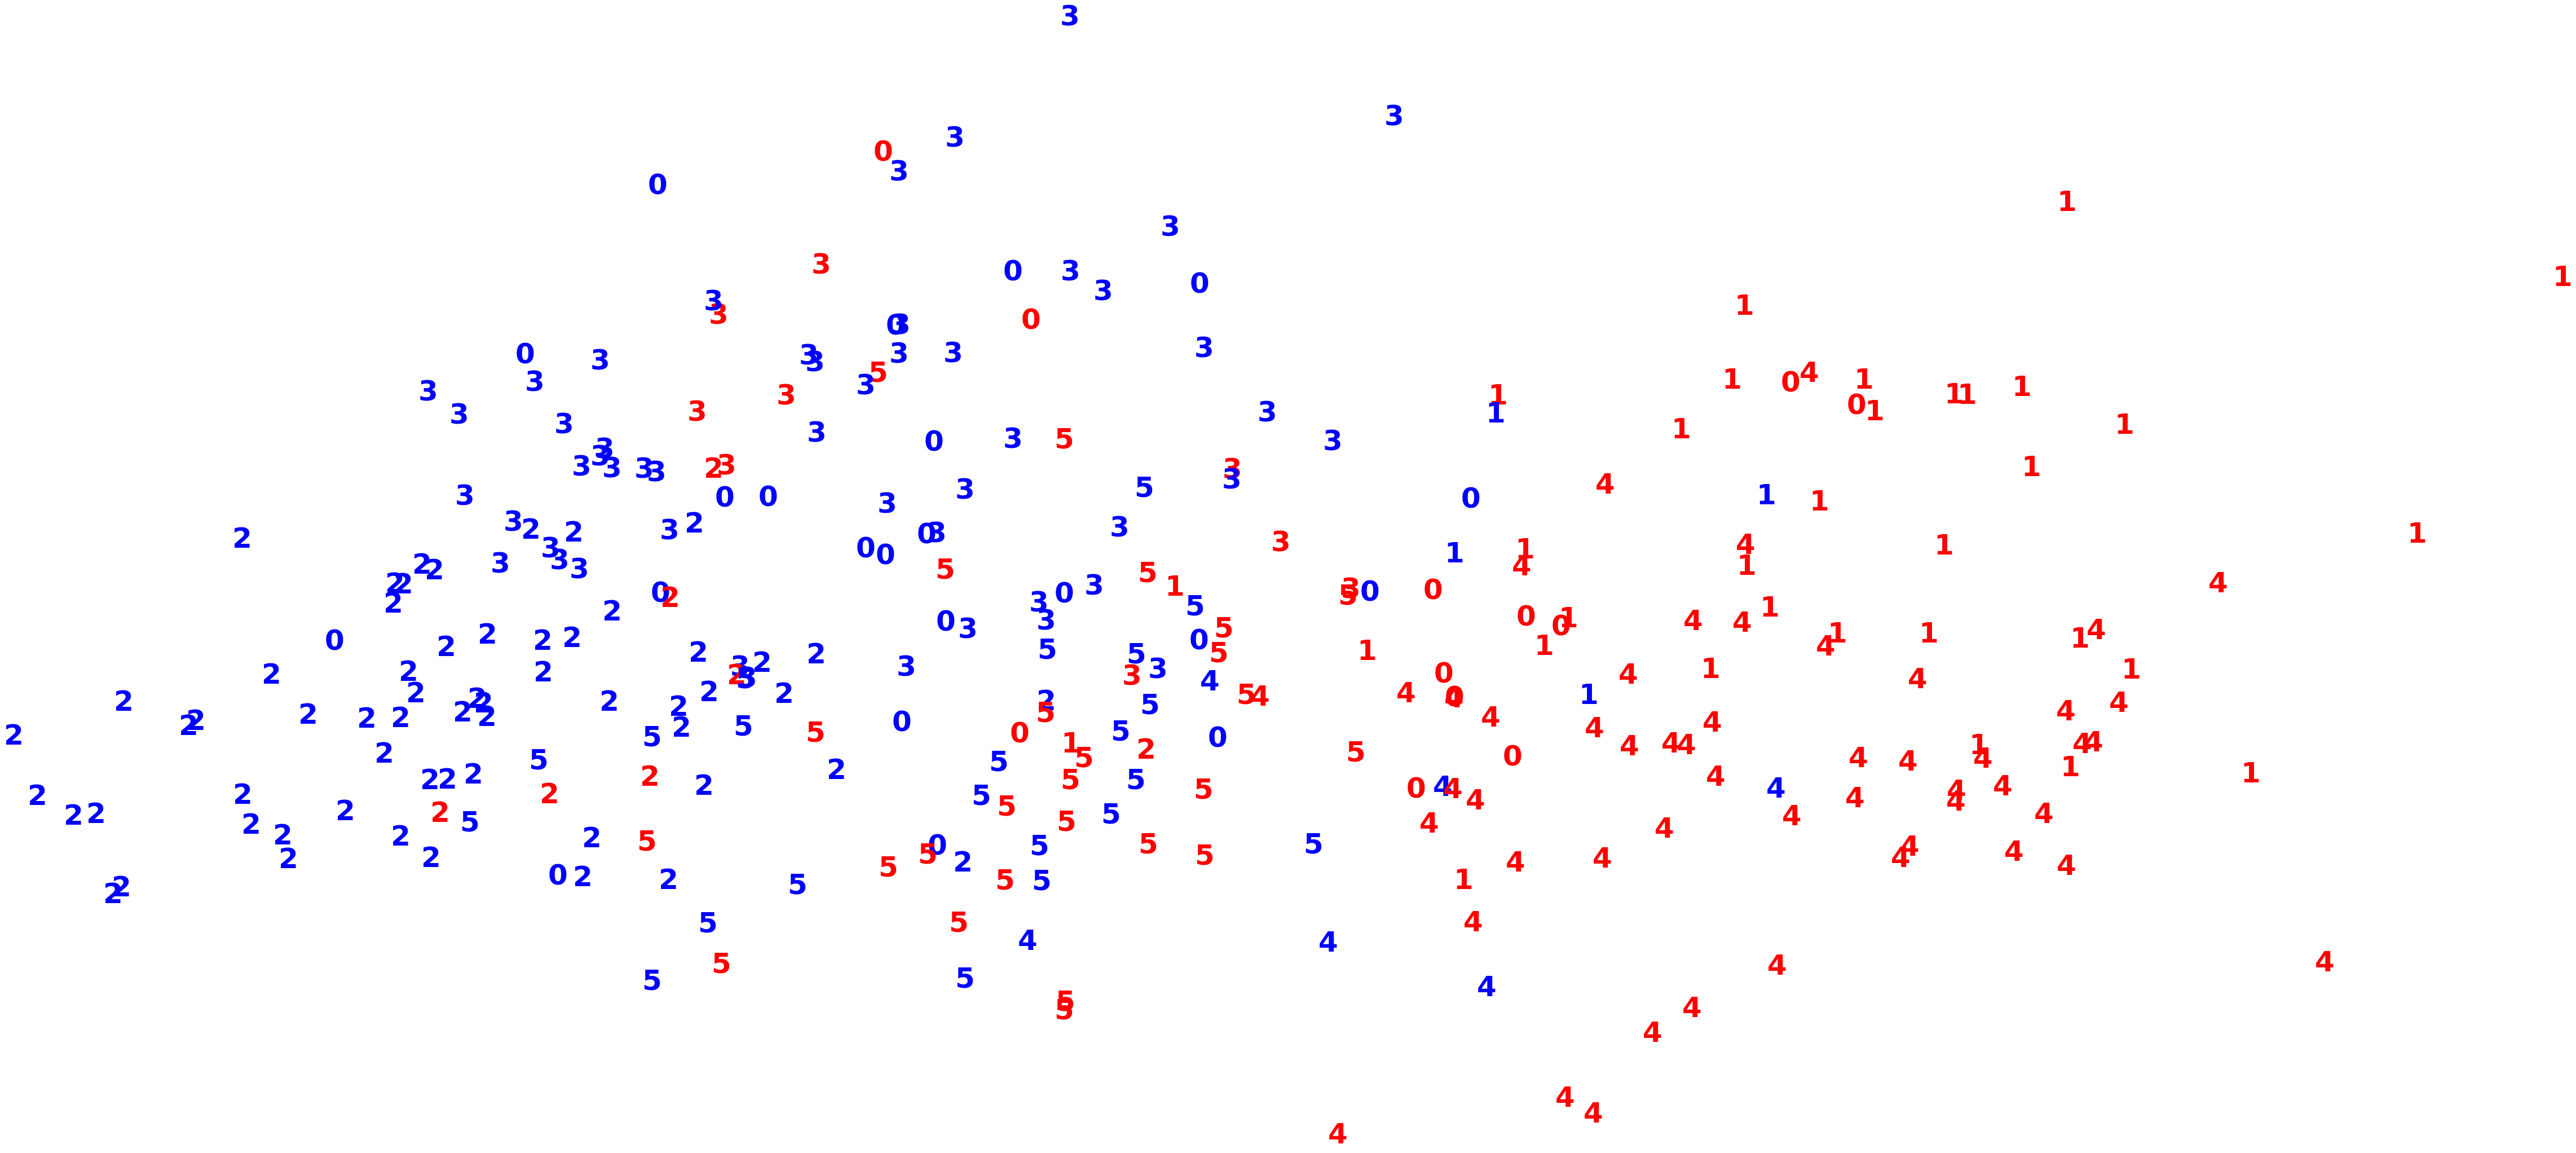

In [22]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans_cluster = KMeans(n_clusters=6, random_state=123)
kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colors = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i,0], pca[i,1], str(y_pred[i]),
            color=colors[y[i]],
            fontdict={'weight': 'bold', 'size': 50}
        )
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

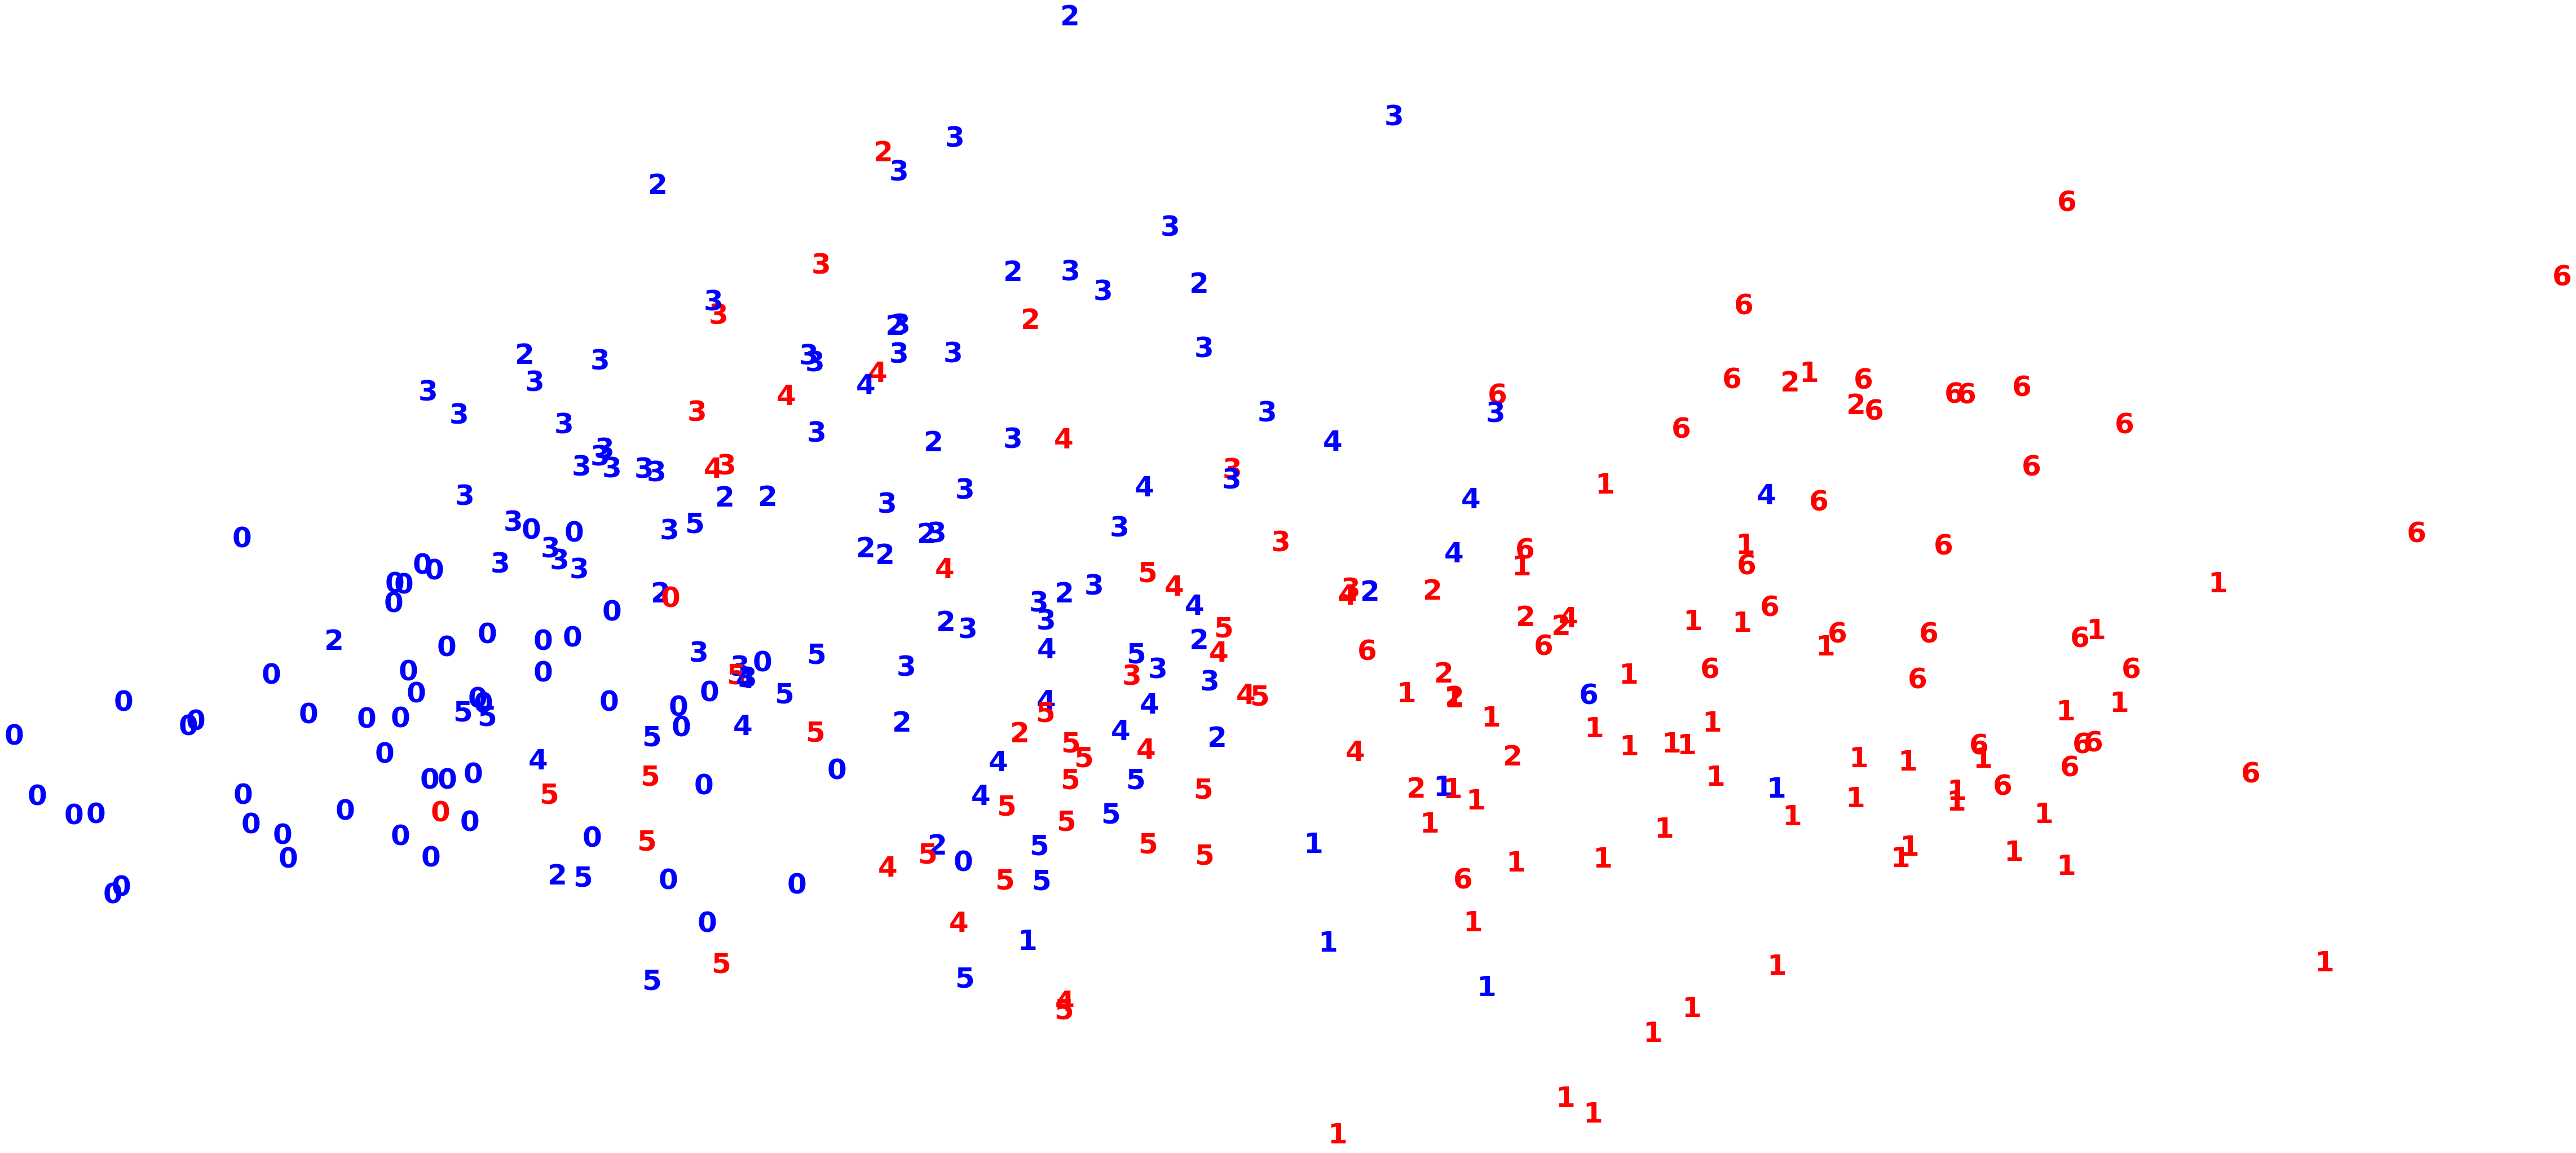

In [23]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans_cluster = KMeans(n_clusters=7, random_state=123)
kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colors = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i,0], pca[i,1], str(y_pred[i]),
            color=colors[y[i]],
            fontdict={'weight': 'bold', 'size': 50}
        )
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

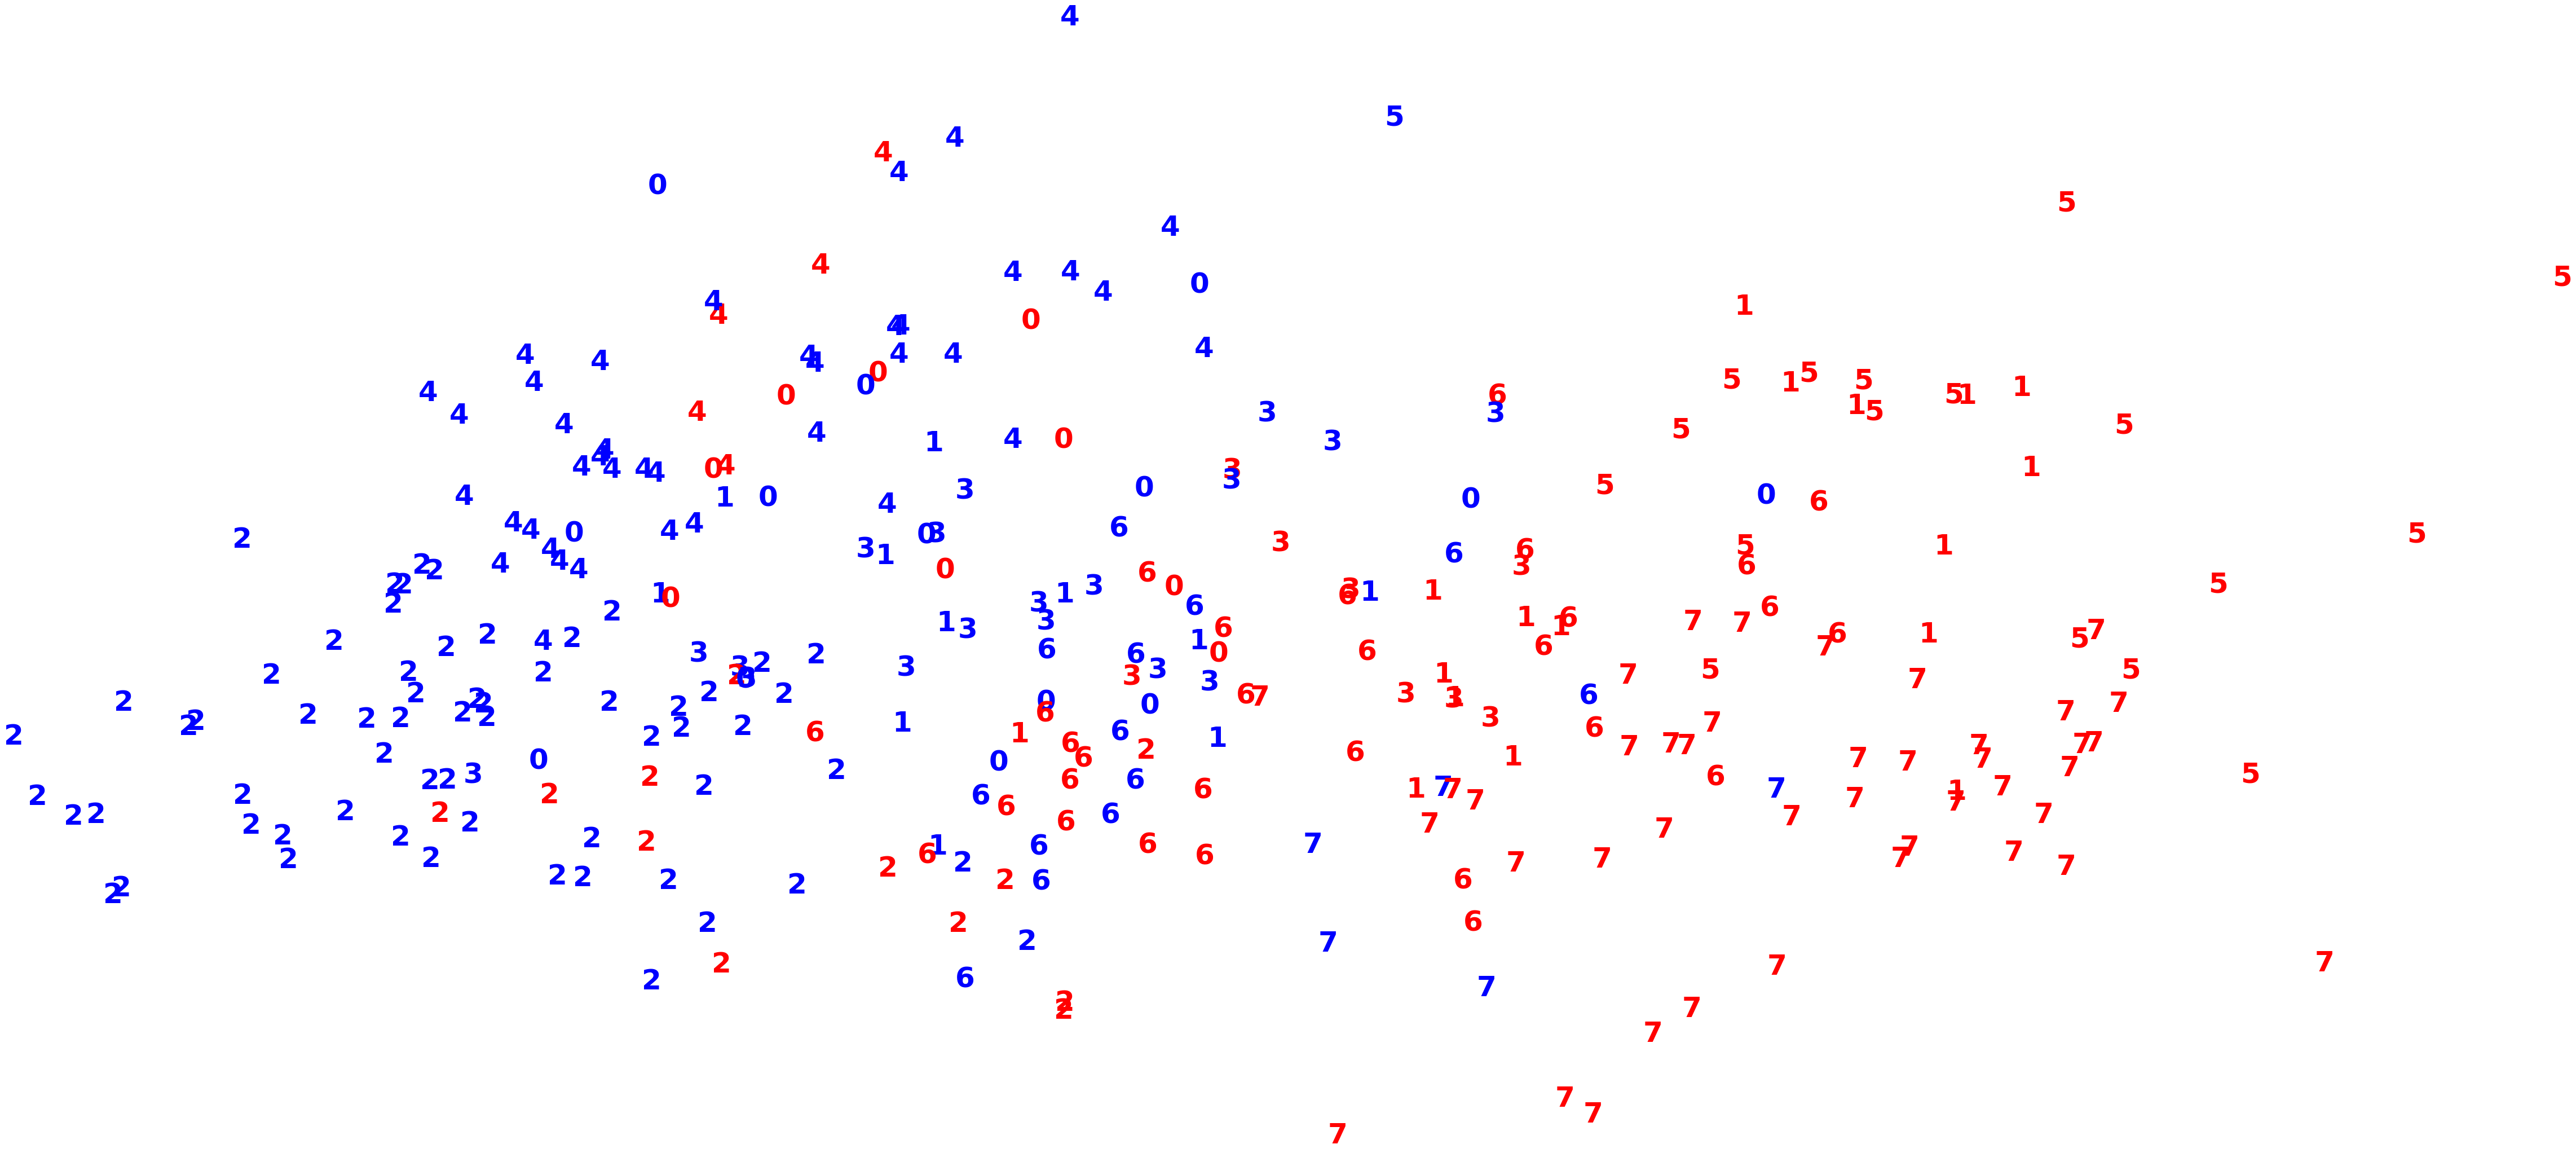

In [24]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans_cluster = KMeans(n_clusters=8, random_state=123)
kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colors = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i,0], pca[i,1], str(y_pred[i]),
            color=colors[y[i]],
            fontdict={'weight': 'bold', 'size': 50}
        )
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

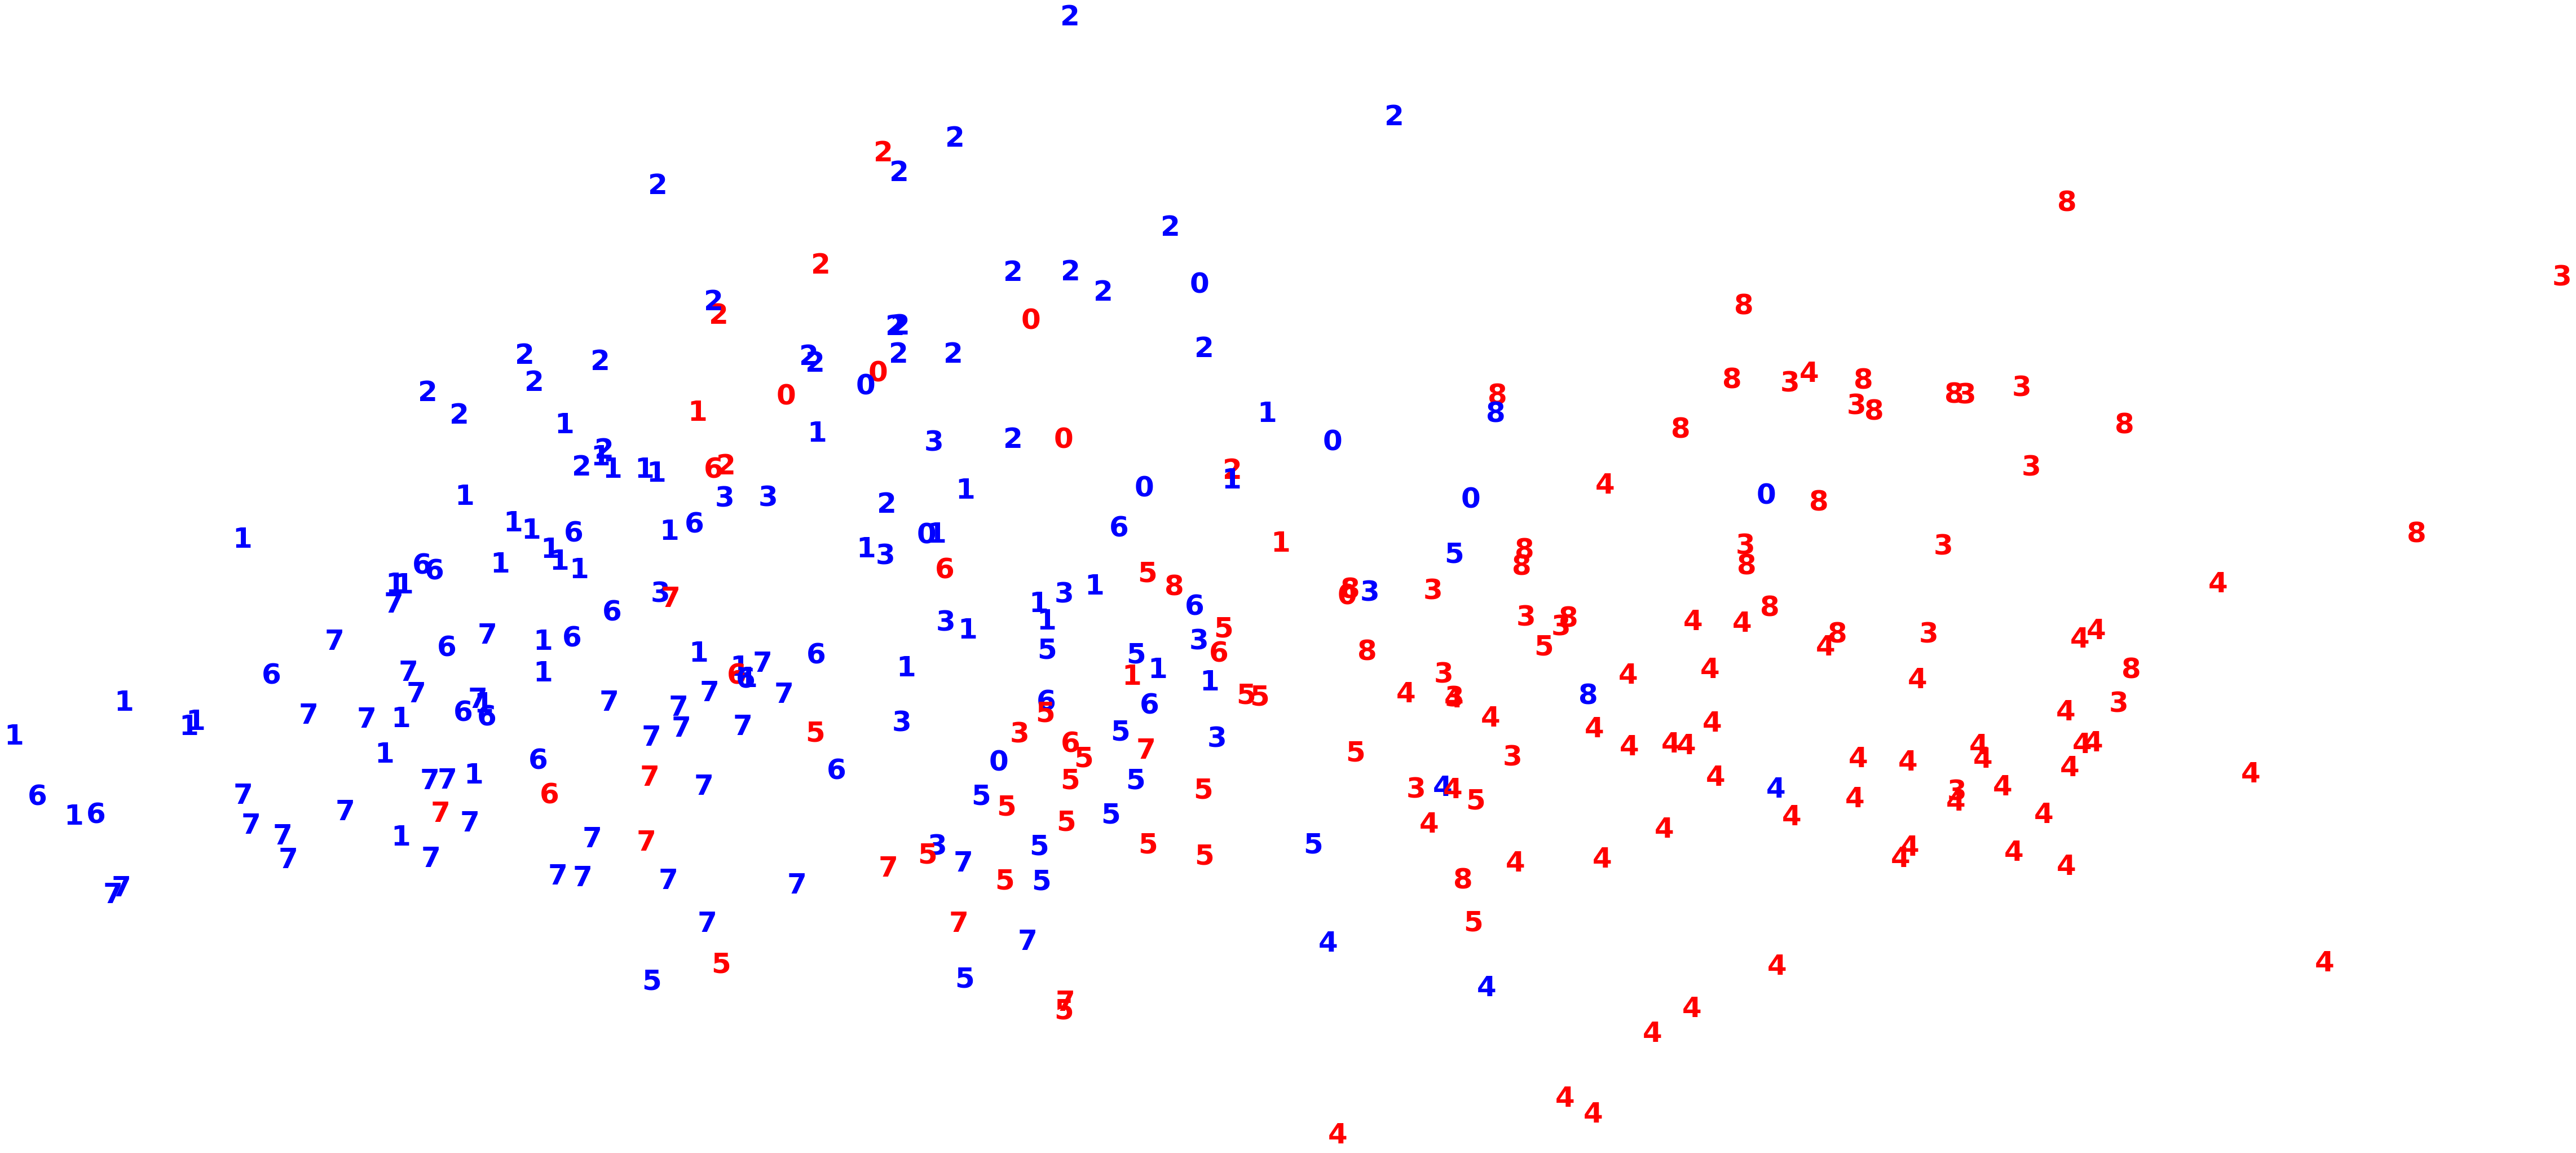

In [25]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans_cluster = KMeans(n_clusters=9, random_state=123)
kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colors = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i,0], pca[i,1], str(y_pred[i]),
            color=colors[y[i]],
            fontdict={'weight': 'bold', 'size': 50}
        )
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

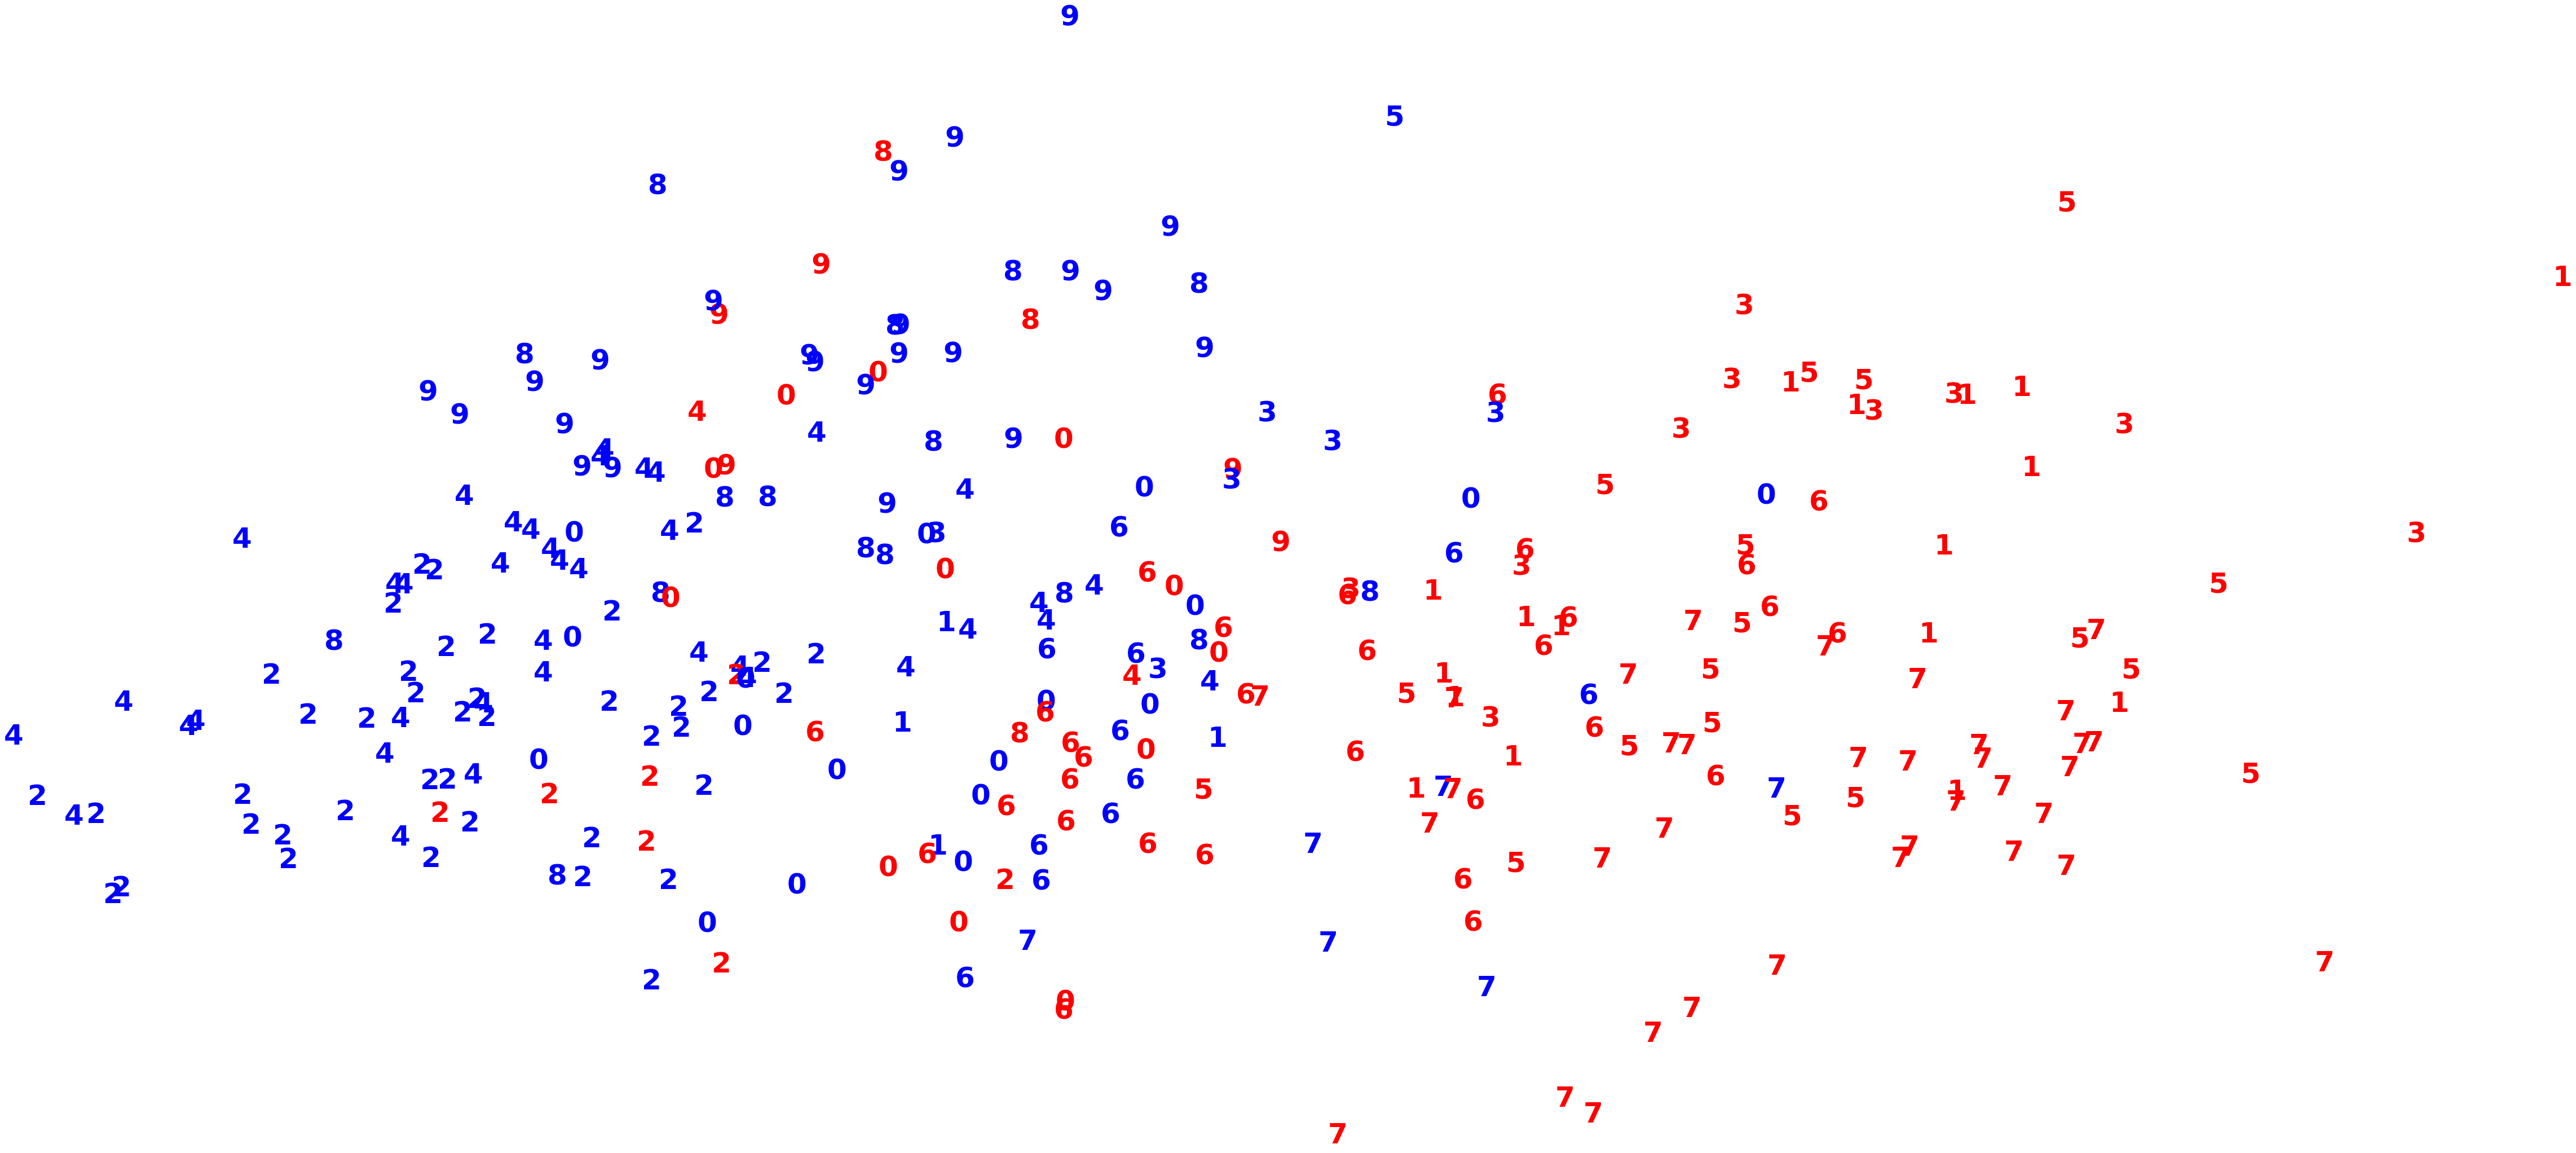

In [26]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans_cluster = KMeans(n_clusters=10, random_state=123)
kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colors = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i,0], pca[i,1], str(y_pred[i]),
            color=colors[y[i]],
            fontdict={'weight': 'bold', 'size': 50}
        )
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()